<a href="https://colab.research.google.com/github/hongqin/Use-R-in-CoLab/blob/master/Learn_R_through_analysis_of_Covid19_in_CoLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome
This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Hong Qin <br>
Started on September 18, 2020. <br>
This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/Use-R-in-CoLab/blob/master/Learn_R_through_analysis_of_Covid19_in_CoLab.ipynb 

More tutorials at http://YouTube.com/hongqin

# Warm up exercises

## Simple calculator

In [3]:
2 + 4
pi
log10(pi)

[1] 6

[1] 3.141593

[1] 0.4971499

In [4]:
2*4
9/3
9-7

[1] 8

[1] 3

[1] 2

In [5]:
?rnorm

In [6]:
?lm

In [7]:
?abline

In [8]:
a_vector = c(1, 3.14159, 5.0, -1, 10)
a_vector

[1]  1.00000  3.14159  5.00000 -1.00000 10.00000

In [9]:
b_vector= a_vector + c(2, 0.5, -5, 1, -10)
b_vector

[1] 3.00000 3.64159 0.00000 0.00000 0.00000

In [10]:
#as.numeric(b_vector)

## Vectors, indexing, plots
x is a vector <br>
y is a vector <br>

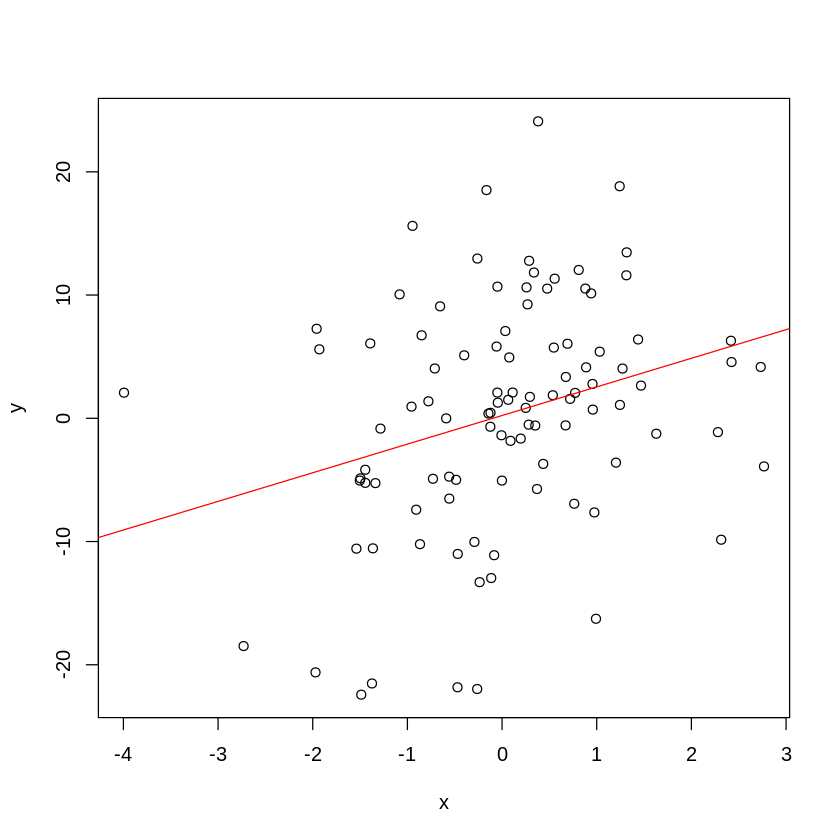

In [11]:
x = rnorm(100) #generate 100 normal-distributed (Gaussain) random nubmers 
y = x + rnorm(100)*10 # y is a linear transformation of x with some Gaussain noise
m = lm( y ~ x)
plot( y ~ x)
abline(m, col='red')

Indexing of elements in a vector

In [12]:
x[1]
x[2]
x[1:5]
x[c(1, 3, 7, 10)]

[1] -3.993661

[1] -0.8669818

[1] -3.9936614 -0.8669818 -0.1218945  1.2032043  0.2858718

[1] -3.9936614 -0.1218945 -2.7302582  0.3808357

## Dataframe, indexing

In [13]:
tb = data.frame( cbind(x, y))
head(tb)

,x,y
,<dbl>,<dbl>
1,-3.9936614,2.0773192
2,-0.8669818,-10.2151951
3,-0.1218945,0.4433693
4,1.2032043,-3.5977365
5,0.2858718,12.7793856
6,0.8798916,10.5257555


In [14]:
tb[1,] #first row

,x,y
,<dbl>,<dbl>
1,-3.993661,2.077319


In [15]:
tb[, 2] #second column

[1]   2.077319222 -10.215195085   0.443369322  -3.597736475  12.779385641
  [6]  10.525755453 -18.480174451  -3.904770322   5.596359592  24.095618715
 [11]  -4.907143848  -5.260215386  10.054785246   4.037044160  11.329901446
 [16] -11.109832894 -21.965351590 -20.617173089  -7.417945848 -21.517499109
 [21]   6.394205874 -11.007041176   4.163820643   6.049154005  13.464272039
 [26]   0.947319298 -10.033559198  18.515825586  -0.516206096   5.822390380
 [31]  -1.376935660  -3.701084306   1.870854216   5.110024501   9.244743108
 [36]   1.738368560   6.293139113 -21.827236714   5.736959131   5.405675398
 [41]  10.682040743 -12.962818214  -1.121413351   0.845076443  11.602824083
 [46]  -0.006489688   1.083888298   4.562908969  12.961565301  -0.684971106
 [51]  18.828340743 -16.267677933  -0.836549732  11.827681675  -6.933764915
 [56] -10.575961776  10.622954563  15.612188351   0.706112072  -6.516360325
 [61]   0.384409819   9.084299716  -5.051361074  -0.576689823  12.036239553
 [66]   4.134018038  -5.239233801   6.732635213 -10.552442832  -5.054655416
 [71]   2.785286180  -1.250843726   4.938727991   1.498709448   2.654205963
 [76]  -5.737852165  -4.735570312   4.041597755   3.353727382   1.379295965
 [81]   6.075020597  10.134940849  10.521638939 -13.296817909  -1.645919167
 [86]  -9.851782278  -0.587947523   7.264064768  -1.830279139   2.062625345
 [91]   2.093064122   1.577682931   7.080250530  -7.639091946   2.085305223
 [96]  -4.872347838  -4.175411089   1.268237830 -22.425395549  -4.991684199

In [16]:
tb[1:5, 1:2] #first 5 rows, two columns

,x,y
,<dbl>,<dbl>
1,-3.9936614,2.0773192
2,-0.8669818,-10.2151951
3,-0.1218945,0.4433693
4,1.2032043,-3.5977365
5,0.2858718,12.7793856


## Load libries

In [17]:
install.packages('reshape2')
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




## Dataframe 

A dataframe can be considered a spreadsheet. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



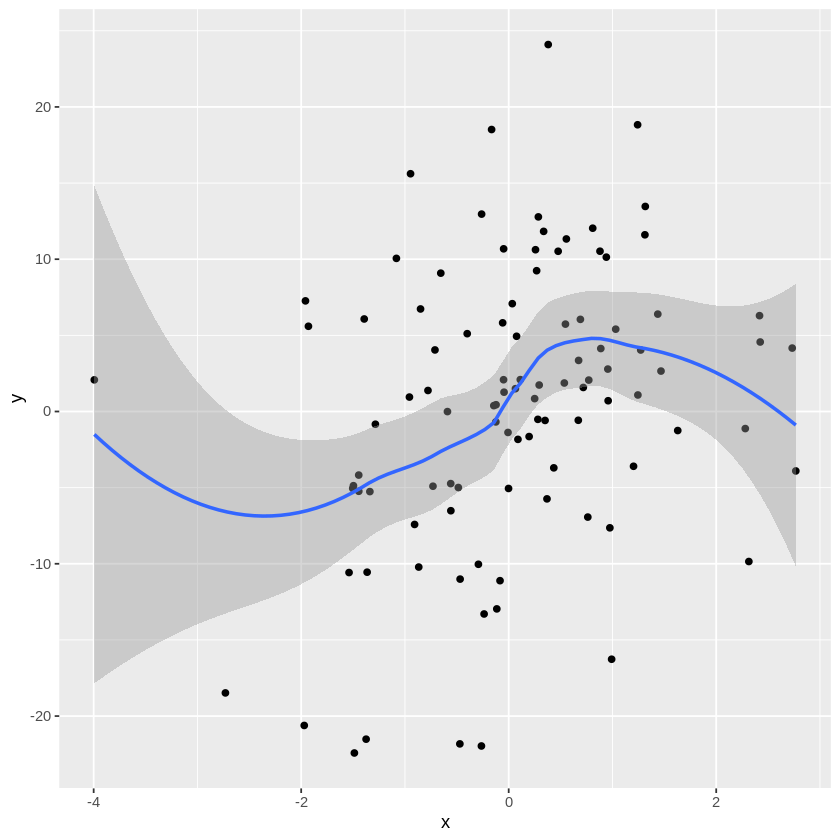

In [18]:
ggplot(tb, aes(x=x, y=y)) + geom_point() + geom_smooth()

mydate is a dataframe (like Phython dataframe)





`geom_smooth()` using method = 'loess' and formula 'y ~ x'



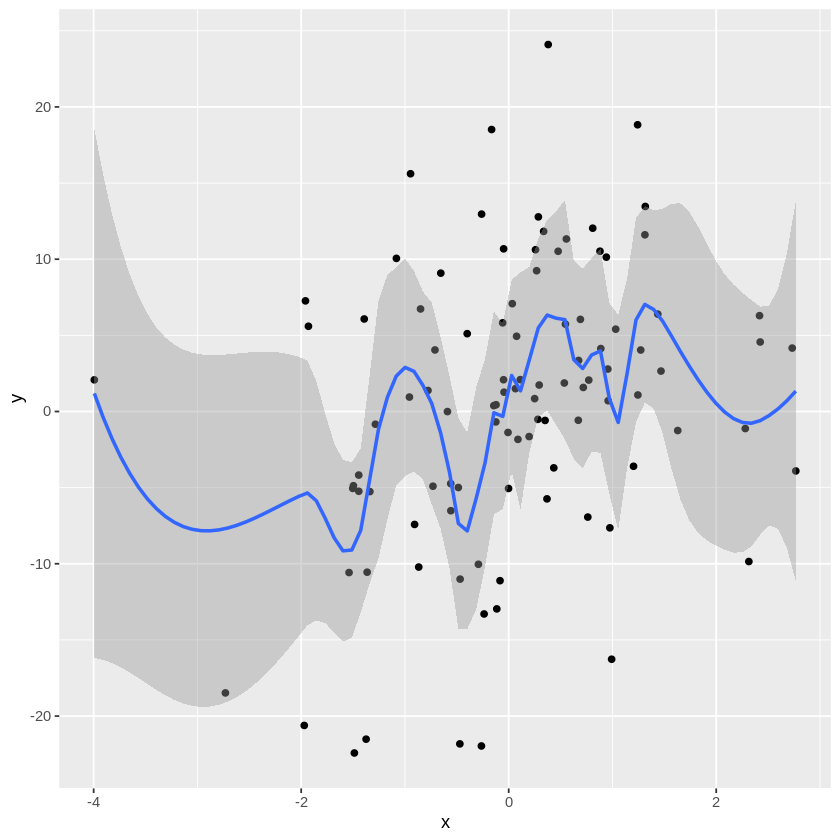

In [19]:
ggplot(tb, aes(x=x, y=y)) + geom_point() + stat_smooth(span=0.2)

## Read a spread sheet

In [20]:
tb = read_csv("https://raw.githubusercontent.com/hongqin/Use-R-in-CoLab/master/vip-grades.csv")

Warning message:
“Missing column names filled in: 'X3' [3], 'X4' [4], 'X5' [5], 'X6' [6], 'X7' [7]”
Parsed with column specification:
cols(
  name = col_character(),
  Grade = col_double(),
  X3 = col_logical(),
  X4 = col_logical(),
  X5 = col_logical(),
  X6 = col_logical(),
  X7 = col_logical()
)



In [21]:
tb

name,Grade,X3,X4,X5,X6,X7
<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
George Washington,85,NA,NA,NA,NA,NA
John Adams,90,NA,NA,NA,NA,NA
Thomas Jefferson,81,NA,NA,NA,NA,NA
James Madison,92,NA,NA,NA,NA,NA
James Monroe,71,NA,NA,NA,NA,NA
Andrew Jackson,86,NA,NA,NA,NA,NA
James K. Polk,70,NA,NA,NA,NA,NA
Zachary Taylor,88,NA,NA,NA,NA,NA
Millard Fillmore,100,NA,NA,NA,NA,NA


### Pick a colum with $ or index

In [22]:
tb$Grade

[1]  85  90  81  92  71  86  70  88 100  99  97  91  83  85  78  99  82  78  84
[20]  73  66  92  89  90  79  81  84  89

In [23]:
tb[, 2]

Grade
<dbl>
85
90
81
92
71
86
70
88
100


### Pick a row 

In [24]:
tb[1,]

name,Grade,X3,X4,X5,X6,X7
<chr>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
George Washington,85,NA,NA,NA,NA,NA


In [25]:
tb %>% dplyr::select( name, Grade )  %>% filter (Grade >= 90)

name,Grade
<chr>,<dbl>
John Adams,90
James Madison,92
Millard Fillmore,100
Franklin Pierce,99
James Buchanan,97
Abraham Lincoln,91
James Garfield,99
Theodore Roosevelt,92
Woodrow Wilson,90


In [26]:
tb %>% dplyr::select( 1:2) %>% filter (Grade > 80 & Grade < 90)

name,Grade
<chr>,<dbl>
George Washington,85
Thomas Jefferson,81
Andrew Jackson,86
Zachary Taylor,88
Andrew Johnson,83
Ulysses S. Grant,85
Chester A. Arthur,82
Benjamin Harrison,84
William Howard Taft,89


## Looking for helps

In [27]:
?date

In [29]:
help(read_csv)

# Part 1, Explore the USA county-level data


We will go through basic R by exploring the Covid19 data set curated by the Johns Hopkins University. 




In [30]:
library(tidyverse)
library(ggplot2)
library(dplyr)

## Load data into DataFrames

In [31]:
# load JHU covid19 data set with tidyverse read_csv
# this is the URL for "view raw " for csv files on GitHub
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1714,1715,1738,1757,1764,1773,1785,1787,1791,1798
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,5124,5141,5165,5456,5477,5526,5588,5606,5640,5997
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,848,851,857,873,882,885,886,886,896,898
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,635,638,642,652,654,656,657,658,664,672
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1573,1580,1594,1608,1611,1617,1618,1621,1629,1634
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,593,597,598,599,604,606,607,607,610,612


## Pick rows, columns, and cells in DataFrames

A a_ij


In [32]:
# pick first row, second colum
tb[1,2] 

# pick 4th row, 5th colum. Notice that R starts with 1, not zero like Python
tb[4, 5]

iso2
<chr>
US


FIPS
<dbl>
1007


In [33]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [34]:
# pick 6-7th rows, 4-8 colums
tb[ 6:7, 4:8]

code3,FIPS,Admin2,Province_State,Country_Region
<dbl>,<dbl>,<chr>,<chr>,<chr>
840,1011,Bullock,Alabama,US
840,1013,Butler,Alabama,US


In [35]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [36]:
?length

In [37]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 265

[1] "There are  265  columns"


In [38]:
# view the first 5 rows in all data columns
tb[1:5 , 12: length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1714,1715,1738,1757,1764,1773,1785,1787,1791,1798
0,0,0,0,0,0,0,0,0,0,⋯,5124,5141,5165,5456,5477,5526,5588,5606,5640,5997
0,0,0,0,0,0,0,0,0,0,⋯,848,851,857,873,882,885,886,886,896,898
0,0,0,0,0,0,0,0,0,0,⋯,635,638,642,652,654,656,657,658,664,672
0,0,0,0,0,0,0,0,0,0,⋯,1573,1580,1594,1608,1611,1617,1618,1621,1629,1634


## Select columns of daily cases

select the all columns of actual data

In [39]:
tb %>% dplyr::select( 12:length(tb[1,]) ) #It seems that CoLab often rquire explicit pakcage for function calls. 


1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,1714,1715,1738,1757,1764,1773,1785,1787,1791,1798
0,0,0,0,0,0,0,0,0,0,⋯,5124,5141,5165,5456,5477,5526,5588,5606,5640,5997
0,0,0,0,0,0,0,0,0,0,⋯,848,851,857,873,882,885,886,886,896,898
0,0,0,0,0,0,0,0,0,0,⋯,635,638,642,652,654,656,657,658,664,672
0,0,0,0,0,0,0,0,0,0,⋯,1573,1580,1594,1608,1611,1617,1618,1621,1629,1634
0,0,0,0,0,0,0,0,0,0,⋯,593,597,598,599,604,606,607,607,610,612
0,0,0,0,0,0,0,0,0,0,⋯,911,911,913,916,912,913,914,917,917,919
0,0,0,0,0,0,0,0,0,0,⋯,3390,3401,3466,3499,3515,3534,3548,3556,3569,3587
0,0,0,0,0,0,0,0,0,0,⋯,1140,1144,1151,1161,1164,1168,1172,1175,1179,1181


## Rotate the data so that daa of each county is in one column

In [40]:
# We need save the data into a new variable 'tb1' so that computer can remember it
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1)) #convert to a dataframe
head(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [41]:
#this is very slow due to installation
#install.packages('data.table')
##library(data.table)
#tb1b <- tb %>% select(12:length(tb[1,])) %>% transpose()
#tb1b

## Add meaning columns names

In [42]:
names(tb1) = tb$Combined_Key
head(tb1[100:110,1:10])

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4/30/20,44,174,39,42,37,13,53,94,295,15
5/1/20,42,175,42,42,39,14,65,93,290,15
5/2/20,45,181,43,42,40,14,92,98,294,15
5/3/20,48,187,45,43,40,14,105,105,300,16
5/4/20,53,188,45,42,40,16,114,105,302,16
5/5/20,53,189,47,43,40,18,120,114,304,17


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [43]:
library(lubridate)
date("10/1/2020")

[1] "10-01-20"

In [44]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20" "1/23/20" "1/24/20" "1/25/20" "1/26/20" "1/27/20" "1/28/20"
  [8] "1/29/20" "1/30/20" "1/31/20" "2/1/20"  "2/2/20"  "2/3/20"  "2/4/20" 
 [15] "2/5/20"  "2/6/20"  "2/7/20"  "2/8/20"  "2/9/20"  "2/10/20" "2/11/20"
 [22] "2/12/20" "2/13/20" "2/14/20" "2/15/20" "2/16/20" "2/17/20" "2/18/20"
 [29] "2/19/20" "2/20/20" "2/21/20" "2/22/20" "2/23/20" "2/24/20" "2/25/20"
 [36] "2/26/20" "2/27/20" "2/28/20" "2/29/20" "3/1/20"  "3/2/20"  "3/3/20" 
 [43] "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20"  "3/8/20"  "3/9/20"  "3/10/20"
 [50] "3/11/20" "3/12/20" "3/13/20" "3/14/20" "3/15/20" "3/16/20" "3/17/20"
 [57] "3/18/20" "3/19/20" "3/20/20" "3/21/20" "3/22/20" "3/23/20" "3/24/20"
 [64] "3/25/20" "3/26/20" "3/27/20" "3/28/20" "3/29/20" "3/30/20" "3/31/20"
 [71] "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20"  "4/5/20"  "4/6/20"  "4/7/20" 
 [78] "4/8/20"  "4/9/20"  "4/10/20" "4/11/20" "4/12/20" "4/13/20" "4/14/20"
 [85] "4/15/20" "4/16/20" "4/17/20" "4/18/20" "4/19/20" "4/20/20" "4/21/20"
 [92] "4/22/20" "4/23/20" "4/24/20" "4/25/20" "4/26/20" "4/27/20" "4/28/20"
 [99] "4/29/20" "4/30/20" "5/1/20"  "5/2/20"  "5/3/20"  "5/4/20"  "5/5/20" 
[106] "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20"  "5/10/20" "5/11/20" "5/12/20"
[113] "5/13/20" "5/14/20" "5/15/20" "5/16/20" "5/17/20" "5/18/20" "5/19/20"
[120] "5/20/20" "5/21/20" "5/22/20" "5/23/20" "5/24/20" "5/25/20" "5/26/20"
[127] "5/27/20" "5/28/20" "5/29/20" "5/30/20" "5/31/20" "6/1/20"  "6/2/20" 
[134] "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20"  "6/7/20"  "6/8/20"  "6/9/20" 
[141] "6/10/20" "6/11/20" "6/12/20" "6/13/20" "6/14/20" "6/15/20" "6/16/20"
[148] "6/17/20" "6/18/20" "6/19/20" "6/20/20" "6/21/20" "6/22/20" "6/23/20"
[155] "6/24/20" "6/25/20" "6/26/20" "6/27/20" "6/28/20" "6/29/20" "6/30/20"
[162] "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20"  "7/5/20"  "7/6/20"  "7/7/20" 
[169] "7/8/20"  "7/9/20"  "7/10/20" "7/11/20" "7/12/20" "7/13/20" "7/14/20"
[176] "7/15/20" "7/16/20" "7/17/20" "7/18/20" "7/19/20" "7/20/20" "7/21/20"
[183] "7/22/20" "7/23/20" "7/24/20" "7/25/20" "7/26/20" "7/27/20" "7/28/20"
[190] "7/29/20" "7/30/20" "7/31/20" "8/1/20"  "8/2/20"  "8/3/20"  "8/4/20" 
[197] "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20"  "8/9/20"  "8/10/20" "8/11/20"
[204] "8/12/20" "8/13/20" "8/14/20" "8/15/20" "8/16/20" "8/17/20" "8/18/20"
[211] "8/19/20" "8/20/20" "8/21/20" "8/22/20" "8/23/20" "8/24/20" "8/25/20"
[218] "8/26/20" "8/27/20" "8/28/20" "8/29/20" "8/30/20" "8/31/20" "9/1/20" 
[225] "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20"  "9/6/20"  "9/7/20"  "9/8/20" 
[232] "9/9/20"  "9/10/20" "9/11/20" "9/12/20" "9/13/20" "9/14/20" "9/15/20"
[239] "9/16/20" "9/17/20" "9/18/20" "9/19/20" "9/20/20" "9/21/20" "9/22/20"
[246] "9/23/20" "9/24/20" "9/25/20" "9/26/20" "9/27/20" "9/28/20" "9/29/20"
[253] "9/30/20" "10/1/20"

In [45]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [46]:
tb1$dates = mdy(current_dates)
head(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/22/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-22
1/23/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-23
1/24/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-24
1/25/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-25
1/26/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-26
1/27/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,2020-01-27


## Select a time window using 'filter'

In [47]:
tb1 %>% filter( dates > mdy("5/1/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/2/20,45,181,43,42,40,14,92,98,294,15,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,48,187,45,43,40,14,105,105,300,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,53,188,45,42,40,16,114,105,302,16,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,53,189,47,43,40,18,120,114,304,17,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,58,196,47,43,42,18,130,114,306,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-06
5/7/20,61,205,51,44,44,18,155,120,308,18,⋯,0,16,3,19,98,8,0,8,0,2020-05-07


In [48]:
start = mdy("9/14/20")
start + ddays(14)

[1] "2020-09-28"

In [49]:
tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9/14/20,1447,4800,626,581,1128
9/15/20,1463,4812,629,580,1139
9/16/20,1619,5003,809,612,1487
9/17/20,1624,5021,809,617,1504
9/18/20,1664,5033,824,619,1527
9/19/20,1673,5047,830,628,1542
9/20/20,1690,5061,835,632,1551
9/21/20,1691,5087,838,636,1560
9/22/20,1714,5124,848,635,1573


## Plot a time window

In [50]:
start = mdy("9/16/20")
start + ddays(14)

tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

[1] "2020-09-30"

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
9/16/20,1619,5003,809,612,1487,2020-09-16
9/17/20,1624,5021,809,617,1504,2020-09-17
9/18/20,1664,5033,824,619,1527,2020-09-18
9/19/20,1673,5047,830,628,1542,2020-09-19
9/20/20,1690,5061,835,632,1551,2020-09-20
9/21/20,1691,5087,838,636,1560,2020-09-21
9/22/20,1714,5124,848,635,1573,2020-09-22
9/23/20,1715,5141,851,638,1580,2020-09-23
9/24/20,1738,5165,857,642,1594,2020-09-24


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



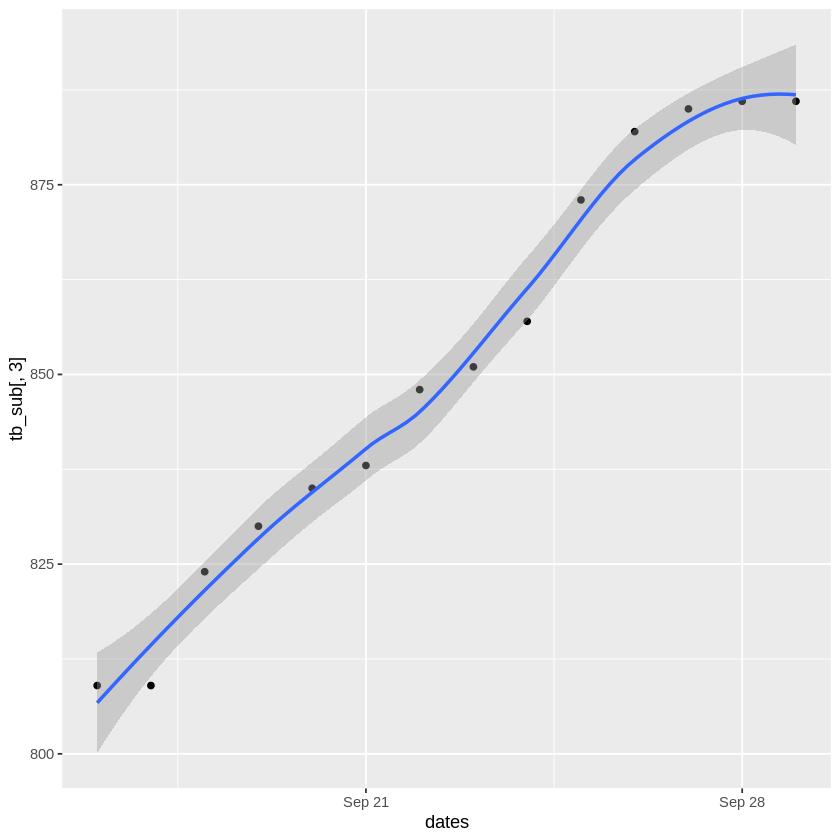

In [51]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

## Now, let's look a specific county. 
How about Hamilton, Tennessee, US?

There are many Hamilton counties in the USA

In [52]:
names(tb1)[ grep("Hamilton", colnames(tb1))]

[1] "Hamilton, Florida, US"   "Hamilton, Illinois, US" 
 [3] "Hamilton, Indiana, US"   "Hamilton, Iowa, US"     
 [5] "Hamilton, Kansas, US"    "Hamilton, Nebraska, US" 
 [7] "Hamilton, New York, US"  "Hamilton, Ohio, US"     
 [9] "Hamilton, Tennessee, US" "Hamilton, Texas, US"

In [53]:
print(paste("There are ", length(names(tb1)[ grep("Hamilton", colnames(tb1))] ), " Hamilton counties in the USA"))

[1] "There are  10  Hamilton counties in the USA"


In [54]:
tb1 %>% dplyr::select ( c('Hamilton, Tennessee, US', 'dates'))

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
1/22/20,0,2020-01-22
1/23/20,0,2020-01-23
1/24/20,0,2020-01-24
1/25/20,0,2020-01-25
1/26/20,0,2020-01-26
1/27/20,0,2020-01-27
1/28/20,0,2020-01-28
1/29/20,0,2020-01-29
1/30/20,0,2020-01-30


In [55]:
tb_HCTN <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, mdy('4/1/20'), mdy('9/30/20')))

head(tb_HCTN)

,"Hamilton, Tennessee, US",dates
,<dbl>,<date>
4/1/20,50,2020-04-01
4/2/20,61,2020-04-02
4/3/20,67,2020-04-03
4/4/20,71,2020-04-04
4/5/20,74,2020-04-05
4/6/20,83,2020-04-06


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



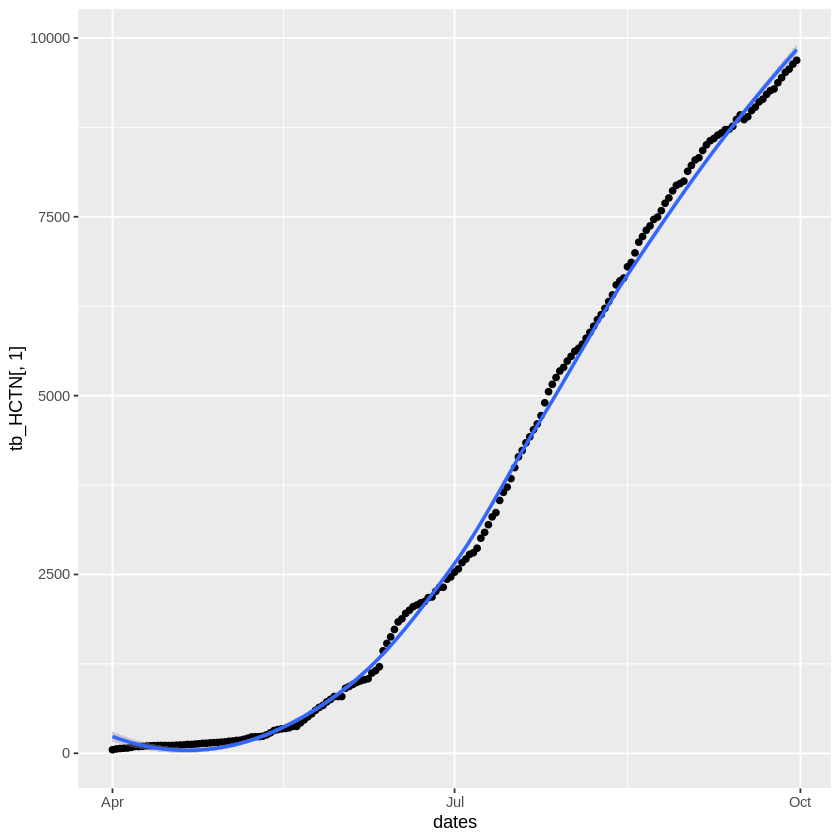

In [56]:
ggplot(tb_HCTN, aes( x = dates, y=tb_HCTN[,1])) + geom_point() + geom_smooth()

## Multiple column plot
How to compare different counties?

In [57]:
names(tb1)[ grep("Tennessee", colnames(tb1))]

[1] "Anderson, Tennessee, US"   "Bedford, Tennessee, US"   
 [3] "Benton, Tennessee, US"     "Bledsoe, Tennessee, US"   
 [5] "Blount, Tennessee, US"     "Bradley, Tennessee, US"   
 [7] "Campbell, Tennessee, US"   "Cannon, Tennessee, US"    
 [9] "Carroll, Tennessee, US"    "Carter, Tennessee, US"    
[11] "Cheatham, Tennessee, US"   "Chester, Tennessee, US"   
[13] "Claiborne, Tennessee, US"  "Clay, Tennessee, US"      
[15] "Cocke, Tennessee, US"      "Coffee, Tennessee, US"    
[17] "Crockett, Tennessee, US"   "Cumberland, Tennessee, US"
[19] "Davidson, Tennessee, US"   "DeKalb,Tennessee,US"      
[21] "Decatur, Tennessee, US"    "Dickson, Tennessee, US"   
[23] "Dyer, Tennessee, US"       "Fayette, Tennessee, US"   
[25] "Fentress, Tennessee, US"   "Franklin, Tennessee, US"  
[27] "Gibson, Tennessee, US"     "Giles, Tennessee, US"     
[29] "Grainger, Tennessee, US"   "Greene, Tennessee, US"    
[31] "Grundy, Tennessee, US"     "Hamblen, Tennessee, US"   
[33] "Hamilton, Tennessee, US"   "Hancock, Tennessee, US"   
[35] "Hardeman, Tennessee, US"   "Hardin, Tennessee, US"    
[37] "Hawkins, Tennessee, US"    "Haywood, Tennessee, US"   
[39] "Henderson, Tennessee, US"  "Henry, Tennessee, US"     
[41] "Hickman, Tennessee, US"    "Houston, Tennessee, US"   
[43] "Humphreys, Tennessee, US"  "Jackson, Tennessee, US"   
[45] "Jefferson, Tennessee, US"  "Johnson, Tennessee, US"   
[47] "Knox, Tennessee, US"       "Lake, Tennessee, US"      
[49] "Lauderdale, Tennessee, US" "Lawrence, Tennessee, US"  
[51] "Lewis, Tennessee, US"      "Lincoln, Tennessee, US"   
[53] "Loudon, Tennessee, US"     "Macon, Tennessee, US"     
[55] "Madison, Tennessee, US"    "Marion, Tennessee, US"    
[57] "Marshall, Tennessee, US"   "Maury, Tennessee, US"     
[59] "McMinn, Tennessee, US"     "McNairy, Tennessee, US"   
[61] "Meigs, Tennessee, US"      "Monroe, Tennessee, US"    
[63] "Montgomery, Tennessee, US" "Moore, Tennessee, US"     
[65] "Morgan, Tennessee, US"     "Obion, Tennessee, US"     
[67] "Out of TN, Tennessee, US"  "Overton, Tennessee, US"   
[69] "Perry, Tennessee, US"      "Pickett, Tennessee, US"   
[71] "Polk, Tennessee, US"       "Putnam, Tennessee, US"    
[73] "Rhea, Tennessee, US"       "Roane, Tennessee, US"     
[75] "Robertson, Tennessee, US"  "Rutherford, Tennessee, US"
[77] "Scott, Tennessee, US"      "Sequatchie, Tennessee, US"
[79] "Sevier, Tennessee, US"     "Shelby, Tennessee, US"    
[81] "Smith, Tennessee, US"      "Stewart, Tennessee, US"   
[83] "Sullivan, Tennessee, US"   "Sumner, Tennessee, US"    
[85] "Tipton, Tennessee, US"     "Trousdale, Tennessee, US" 
[87] "Unassigned, Tennessee, US" "Unicoi, Tennessee, US"    
[89] "Union, Tennessee, US"      "Van Buren, Tennessee, US" 
[91] "Warren, Tennessee, US"     "Washington, Tennessee, US"
[93] "Wayne, Tennessee, US"      "Weakley, Tennessee, US"   
[95] "White, Tennessee, US"      "Williamson, Tennessee, US"
[97] "Wilson, Tennessee, US"

In [58]:
print(paste("There are ", length( names(tb1)[ grep("Tennessee", colnames(tb1))])  ," counties in Tennessee. Really?"))

[1] "There are  97  counties in Tennessee. Really?"


In [59]:
mycounties = c( 'Hamilton, Tennessee, US', 'Knox, Tennessee, US')

days_window = 90 #90-day window
endday = '9/30/20'

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, mdy(endday)-ddays(days_window), mdy(endday)))   

head(tb_sub)


,"Hamilton, Tennessee, US","Knox, Tennessee, US",dates
,<dbl>,<dbl>,<date>
7/2/20,2577,1022,2020-07-02
7/3/20,2665,1086,2020-07-03
7/4/20,2716,1142,2020-07-04
7/5/20,2781,1171,2020-07-05
7/6/20,2804,1209,2020-07-06
7/7/20,2867,1309,2020-07-07


In [60]:
library(reshape2)
df_tmp <- melt(tb_sub, measure.vars = mycounties, value.name = 'DailyCases', variable.name = 'Counties')
head(df_tmp)

,dates,Counties,DailyCases
,<date>,<fct>,<dbl>
1,2020-07-02,"Hamilton, Tennessee, US",2577
2,2020-07-03,"Hamilton, Tennessee, US",2665
3,2020-07-04,"Hamilton, Tennessee, US",2716
4,2020-07-05,"Hamilton, Tennessee, US",2781
5,2020-07-06,"Hamilton, Tennessee, US",2804
6,2020-07-07,"Hamilton, Tennessee, US",2867


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



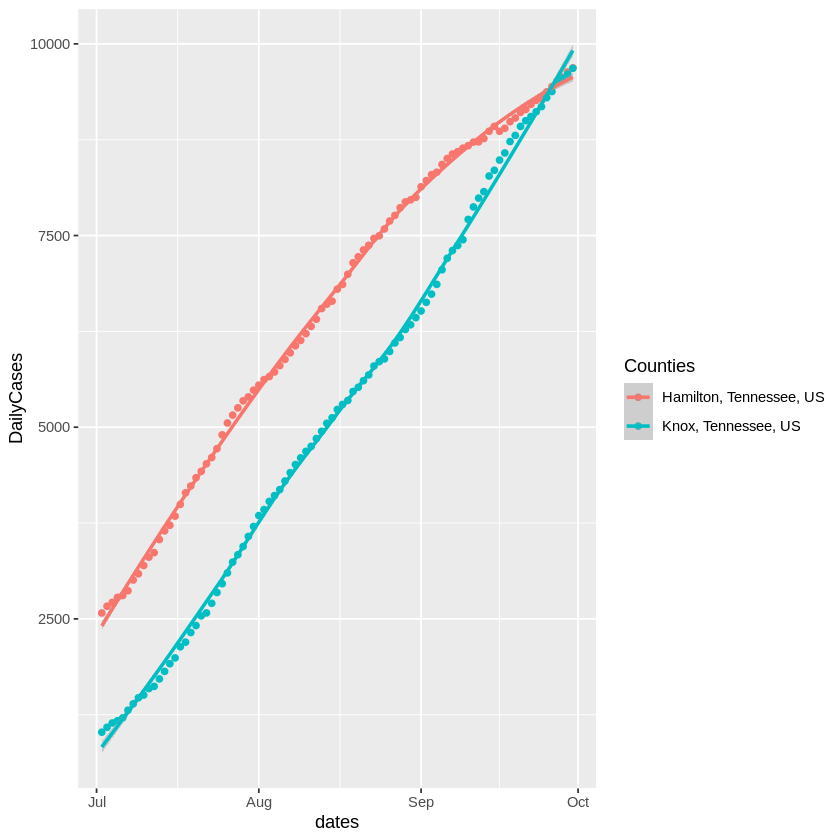

In [61]:
ggplot( df_tmp, aes(x=dates, y=DailyCases, color=Counties) ) + geom_point() + geom_smooth()

# Part 2, Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [62]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,1714,1715,1738,1757,1764,1773,1785,1787,1791,1798
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,5124,5141,5165,5456,5477,5526,5588,5606,5640,5997
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,848,851,857,873,882,885,886,886,896,898
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,635,638,642,652,654,656,657,658,664,672
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,1573,1580,1594,1608,1611,1617,1618,1621,1629,1634
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,593,597,598,599,604,606,607,607,610,612


merge all row of the same state by 'group_by'
follow by 'summarize_if'

In [63]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

head(tb2)

Province_State,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,⋯,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alabama,0,0,0,0,0,0,0,0,0,⋯,146584,147153,148206,150658,151591,152321,152983,153554,154701,155744
Alaska,0,0,0,0,0,0,0,0,0,⋯,6936,7004,7132,7254,7367,7481,7597,7722,7824,7948
American Samoa,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Arizona,1,1,1,1,1,1,2,4,4,⋯,214846,215284,215852,216367,216826,217237,217510,218184,218507,219212
Arkansas,0,0,0,0,0,0,0,0,0,⋯,76981,77963,79049,79946,80755,81242,82049,82755,83697,84821
California,12,12,21,25,35,51,59,81,95,⋯,793065,796436,799516,803660,807451,809890,812711,815654,819115,822205


In [64]:
length( tb2$Province_State )
print( paste("There are ", length( tb2$Province_State ),  " states"))

[1] 58

[1] "There are  58  states"


## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [65]:
? apply

In [66]:
? diff

In [67]:
x = data.frame(1:10)
x

X1.10
<int>
1
2
3
4
5
6
7
8
9


In [68]:
apply(x, 2, diff)

X1.10
1
1
1
1
1
1
1
1
1


In [69]:
y = data.frame(10:1)
y

X10.1
<int>
10
9
8
7
6
5
4
3
2


In [70]:
apply(y, 2, diff)

X10.1
-1
-1
-1
-1
-1
-1
-1
-1
-1


### Now, process a small data set to verify the results

In [72]:
test = tb2[1:5, 10:20]
test

3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,5,7,11,29,39,51
0,0,0,0,0,1,1,1,1,3,5
0,0,0,0,0,0,0,0,0,0,0
4,4,6,9,9,9,12,12,18,20,27
0,0,0,0,0,9,12,3,3,3,4


In [73]:
apply( test, 1, diff)

3/9/20,0,0,0,0,0
3/10/20,0,0,0,2,0
3/11/20,0,0,0,3,0
3/12/20,0,0,0,0,0
3/13/20,5,1,0,0,9
3/14/20,2,0,0,3,3
3/15/20,4,0,0,0,-9
3/16/20,18,0,0,6,0
3/17/20,10,2,0,2,0
3/18/20,12,2,0,7,1


### Now, we are comfortable to apply our method to the entire data set. 

In [74]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X49,X50,X51,X52,X53,X54,X55,X56,X57,X58
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,4,0,0,0
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,0,7,0,0,0
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,9,0,0,0
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,1,3,0,0,0,0,31,0,0,0
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,0,1,0,0,0,0,8,0,0,0


## Add states names as columns names

Current names are not informative

In [75]:
names(tb3)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18" "X19" "X20" "X21" "X22" "X23" "X24"
[25] "X25" "X26" "X27" "X28" "X29" "X30" "X31" "X32" "X33" "X34" "X35" "X36"
[37] "X37" "X38" "X39" "X40" "X41" "X42" "X43" "X44" "X45" "X46" "X47" "X48"
[49] "X49" "X50" "X51" "X52" "X53" "X54" "X55" "X56" "X57" "X58"

Information of States will be more relevant.

In [76]:
tb2$Province_State

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"

Assign the columns names with the State-names

In [77]:
names(tb3) = tb2$Province_State
head(tb3)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,⋯,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,4,0,0,0
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,0,7,0,0,0
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,0,9,0,0,0
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,0,12,0,0,0
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,1,3,0,0,0,0,31,0,0,0
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,0,1,0,0,0,0,8,0,0,0


## Convert date-text to Date type

In [78]:
row.names(tb3)

[1] "3/1/20"  "3/2/20"  "3/3/20"  "3/4/20"  "3/5/20"  "3/6/20"  "3/7/20" 
  [8] "3/8/20"  "3/9/20"  "3/10/20" "3/11/20" "3/12/20" "3/13/20" "3/14/20"
 [15] "3/15/20" "3/16/20" "3/17/20" "3/18/20" "3/19/20" "3/20/20" "3/21/20"
 [22] "3/22/20" "3/23/20" "3/24/20" "3/25/20" "3/26/20" "3/27/20" "3/28/20"
 [29] "3/29/20" "3/30/20" "3/31/20" "4/1/20"  "4/2/20"  "4/3/20"  "4/4/20" 
 [36] "4/5/20"  "4/6/20"  "4/7/20"  "4/8/20"  "4/9/20"  "4/10/20" "4/11/20"
 [43] "4/12/20" "4/13/20" "4/14/20" "4/15/20" "4/16/20" "4/17/20" "4/18/20"
 [50] "4/19/20" "4/20/20" "4/21/20" "4/22/20" "4/23/20" "4/24/20" "4/25/20"
 [57] "4/26/20" "4/27/20" "4/28/20" "4/29/20" "4/30/20" "5/1/20"  "5/2/20" 
 [64] "5/3/20"  "5/4/20"  "5/5/20"  "5/6/20"  "5/7/20"  "5/8/20"  "5/9/20" 
 [71] "5/10/20" "5/11/20" "5/12/20" "5/13/20" "5/14/20" "5/15/20" "5/16/20"
 [78] "5/17/20" "5/18/20" "5/19/20" "5/20/20" "5/21/20" "5/22/20" "5/23/20"
 [85] "5/24/20" "5/25/20" "5/26/20" "5/27/20" "5/28/20" "5/29/20" "5/30/20"
 [92] "5/31/20" "6/1/20"  "6/2/20"  "6/3/20"  "6/4/20"  "6/5/20"  "6/6/20" 
 [99] "6/7/20"  "6/8/20"  "6/9/20"  "6/10/20" "6/11/20" "6/12/20" "6/13/20"
[106] "6/14/20" "6/15/20" "6/16/20" "6/17/20" "6/18/20" "6/19/20" "6/20/20"
[113] "6/21/20" "6/22/20" "6/23/20" "6/24/20" "6/25/20" "6/26/20" "6/27/20"
[120] "6/28/20" "6/29/20" "6/30/20" "7/1/20"  "7/2/20"  "7/3/20"  "7/4/20" 
[127] "7/5/20"  "7/6/20"  "7/7/20"  "7/8/20"  "7/9/20"  "7/10/20" "7/11/20"
[134] "7/12/20" "7/13/20" "7/14/20" "7/15/20" "7/16/20" "7/17/20" "7/18/20"
[141] "7/19/20" "7/20/20" "7/21/20" "7/22/20" "7/23/20" "7/24/20" "7/25/20"
[148] "7/26/20" "7/27/20" "7/28/20" "7/29/20" "7/30/20" "7/31/20" "8/1/20" 
[155] "8/2/20"  "8/3/20"  "8/4/20"  "8/5/20"  "8/6/20"  "8/7/20"  "8/8/20" 
[162] "8/9/20"  "8/10/20" "8/11/20" "8/12/20" "8/13/20" "8/14/20" "8/15/20"
[169] "8/16/20" "8/17/20" "8/18/20" "8/19/20" "8/20/20" "8/21/20" "8/22/20"
[176] "8/23/20" "8/24/20" "8/25/20" "8/26/20" "8/27/20" "8/28/20" "8/29/20"
[183] "8/30/20" "8/31/20" "9/1/20"  "9/2/20"  "9/3/20"  "9/4/20"  "9/5/20" 
[190] "9/6/20"  "9/7/20"  "9/8/20"  "9/9/20"  "9/10/20" "9/11/20" "9/12/20"
[197] "9/13/20" "9/14/20" "9/15/20" "9/16/20" "9/17/20" "9/18/20" "9/19/20"
[204] "9/20/20" "9/21/20" "9/22/20" "9/23/20" "9/24/20" "9/25/20" "9/26/20"
[211] "9/27/20" "9/28/20" "9/29/20" "9/30/20" "10/1/20"

In [79]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Diamond Princess,⋯,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/1/20,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,4,0,0,0,2020-03-01
3/2/20,0,0,0,0,0,9,0,0,0,0,⋯,0,0,0,0,0,7,0,0,0,2020-03-02
3/3/20,0,0,0,0,0,4,0,0,0,0,⋯,0,0,0,0,0,9,0,0,0,2020-03-03
3/4/20,0,0,0,0,0,10,0,0,0,0,⋯,0,0,0,0,0,12,0,0,0,2020-03-04
3/5/20,0,0,0,0,0,16,2,0,0,0,⋯,3,0,0,0,0,31,0,0,0,2020-03-05
3/6/20,0,0,0,1,0,8,6,0,0,0,⋯,1,0,0,0,0,8,0,0,0,2020-03-06


## Plot

In [80]:
tb3[,2]

[1]   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   2   2
 [19]   3   3   2   5  12   4   7  15   2  27  17  12   5  13  11  14  14  14
 [37]   5  23  13   9  11  11  15   5   8   8   7   9   5   5   2   8   6   2
 [55]   2   0   1   5   6   4   0   9   1   3   2   1   1   2   3   1   1   0
 [73]   4   0   0   5   0   0   0  12   1   0   2   4   0   1   2   1  13   5
 [91]   4  26   7  20  18   8  11  12   8  19  10  20  17  15  29   7   3  12
[109]  20  12  13  21  11   6   2  29  24  20  18  29  21  36  38  39  46  47
[127]  27  28  18  42  46  55  62  94  60  40  52  62  41  62  79  75  92  89
[145]  62  56  90 186  98 107  68  81 111 146 144  61  53  54  35  53  77  98
[163]  63  45  60  84 110  83 103  50  62  67  82  68  89  64  69  33  52  79
[181] 118  90  44  37  34  65 102 120  93  83  33  35  63 121  92 103  61  75
[199]  41  48 105 107  85  93  70  44  68 128 122 113 114 116 125 102 124

### Scatter plot with trend

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



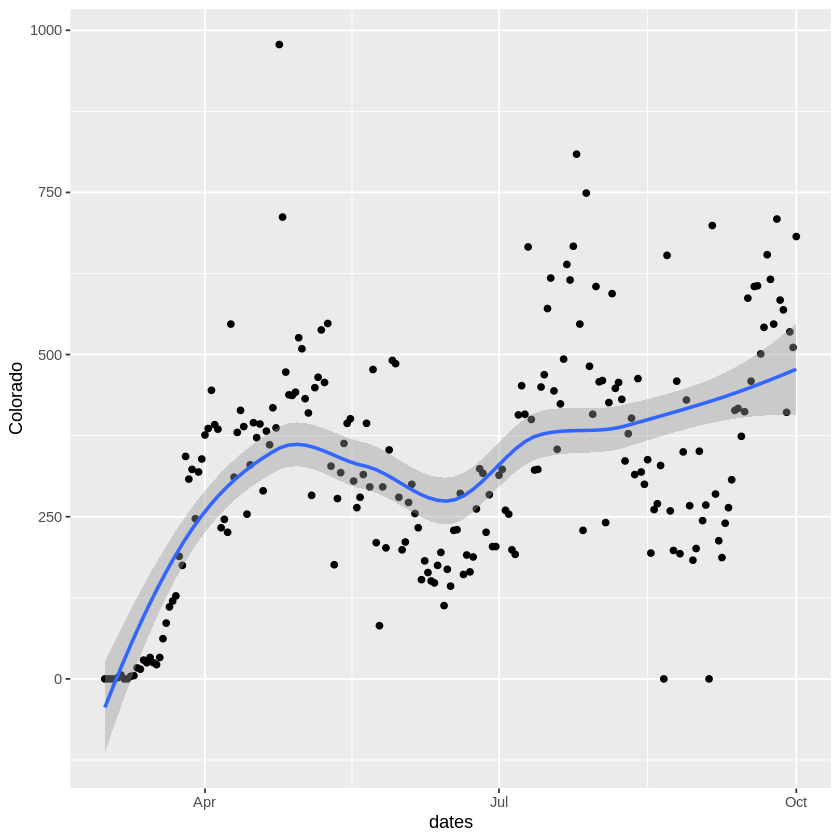

In [81]:
ggplot(tb3, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Plot for a time-window

In [82]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

[1] "2020-10-01"

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



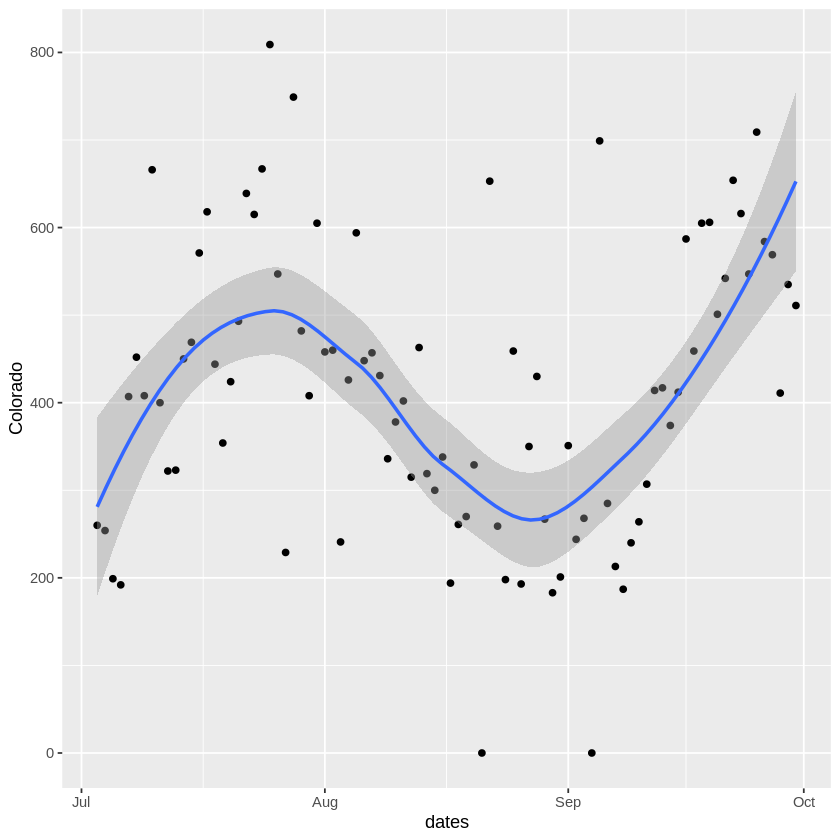

In [83]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [84]:
names(tb3)

[1] "Alabama"                  "Alaska"                  
 [3] "American Samoa"           "Arizona"                 
 [5] "Arkansas"                 "California"              
 [7] "Colorado"                 "Connecticut"             
 [9] "Delaware"                 "Diamond Princess"        
[11] "District of Columbia"     "Florida"                 
[13] "Georgia"                  "Grand Princess"          
[15] "Guam"                     "Hawaii"                  
[17] "Idaho"                    "Illinois"                
[19] "Indiana"                  "Iowa"                    
[21] "Kansas"                   "Kentucky"                
[23] "Louisiana"                "Maine"                   
[25] "Maryland"                 "Massachusetts"           
[27] "Michigan"                 "Minnesota"               
[29] "Mississippi"              "Missouri"                
[31] "Montana"                  "Nebraska"                
[33] "Nevada"                   "New Hampshire"           
[35] "New Jersey"               "New Mexico"              
[37] "New York"                 "North Carolina"          
[39] "North Dakota"             "Northern Mariana Islands"
[41] "Ohio"                     "Oklahoma"                
[43] "Oregon"                   "Pennsylvania"            
[45] "Puerto Rico"              "Rhode Island"            
[47] "South Carolina"           "South Dakota"            
[49] "Tennessee"                "Texas"                   
[51] "Utah"                     "Vermont"                 
[53] "Virgin Islands"           "Virginia"                
[55] "Washington"               "West Virginia"           
[57] "Wisconsin"                "Wyoming"                 
[59] "dates"

In [85]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [86]:
head(tb_TN)

,Tennessee,dates
,<dbl>,<date>
7/4/20,1428,2020-07-04
7/5/20,1176,2020-07-05
7/6/20,723,2020-07-06
7/7/20,1475,2020-07-07
7/8/20,2472,2020-07-08
7/9/20,1605,2020-07-09


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



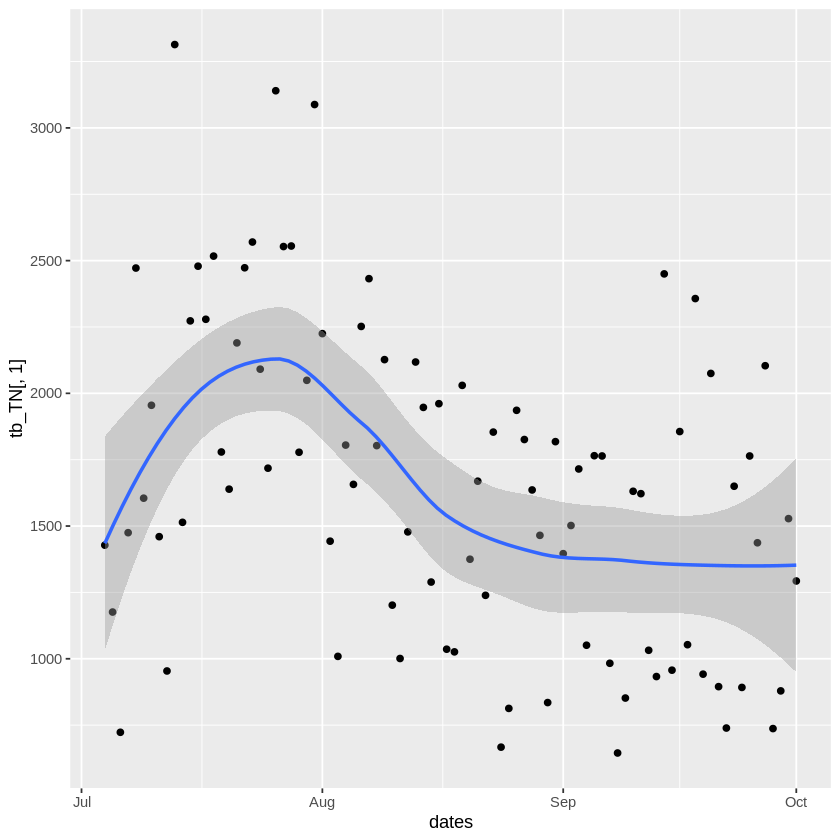

In [87]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [88]:
days_window = 90 #90-day window
endday = today(tzone='Est') -1

tb_2States <- tb3 %>% 
  dplyr::select( 'Tennessee','Georgia', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_2States)

Warning message in with_tz(Sys.time(), tzone):
“Unrecognized time zone 'Est'”


,Tennessee,Georgia,dates
,<dbl>,<dbl>,<date>
7/3/20,1822,2784,2020-07-03
7/4/20,1428,2826,2020-07-04
7/5/20,1176,2197,2020-07-05
7/6/20,723,1548,2020-07-06
7/7/20,1475,3406,2020-07-07
7/8/20,2472,3420,2020-07-08


In [89]:
library(reshape2)

In [90]:
df_tmp <- melt(tb_2States, measure.vars = c('Tennessee', 'Georgia'))
head(df_tmp)

,dates,variable,value
,<date>,<fct>,<dbl>
1,2020-07-03,Tennessee,1822
2,2020-07-04,Tennessee,1428
3,2020-07-05,Tennessee,1176
4,2020-07-06,Tennessee,723
5,2020-07-07,Tennessee,1475
6,2020-07-08,Tennessee,2472


In [91]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-07-03,Tennessee,1822
2,2020-07-04,Tennessee,1428
3,2020-07-05,Tennessee,1176
4,2020-07-06,Tennessee,723
5,2020-07-07,Tennessee,1475
6,2020-07-08,Tennessee,2472


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



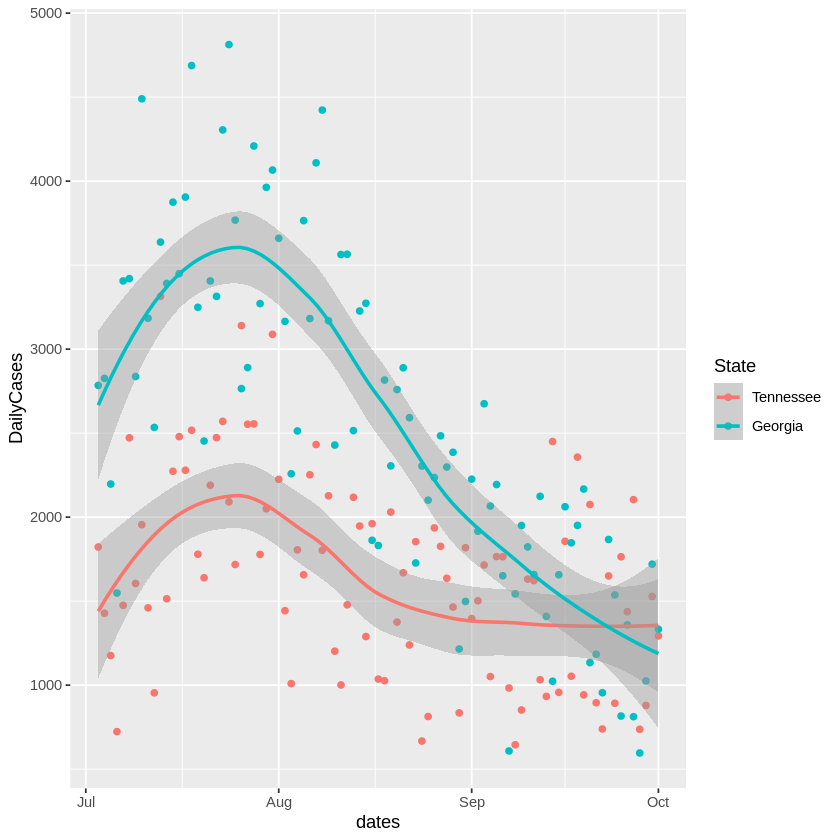

In [92]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + geom_smooth()

### How about more than two states? 

In [93]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


,Tennessee,Georgia,Alabama,Florida,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
7/3/20,1822,2784,1754,9488,2020-07-03
7/4/20,1428,2826,997,11458,2020-07-04
7/5/20,1176,2197,1091,10059,2020-07-05
7/6/20,723,1548,925,6336,2020-07-06
7/7/20,1475,3406,907,7347,2020-07-07
7/8/20,2472,3420,1177,9989,2020-07-08


In [94]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-07-03,Tennessee,1822
2,2020-07-04,Tennessee,1428
3,2020-07-05,Tennessee,1176
4,2020-07-06,Tennessee,723
5,2020-07-07,Tennessee,1475
6,2020-07-08,Tennessee,2472


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



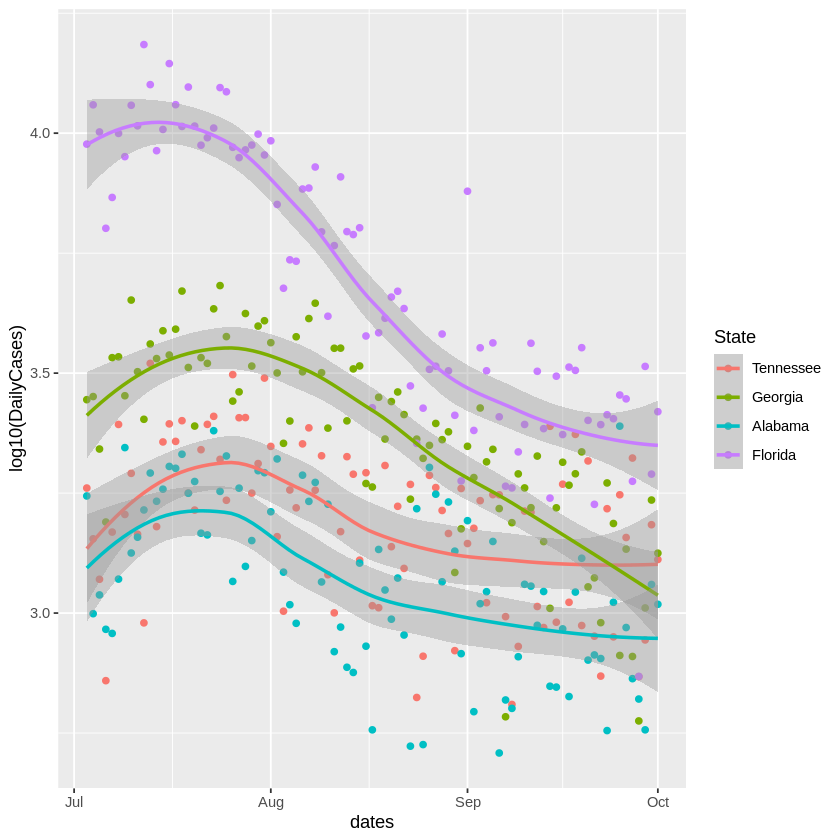

In [95]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Part 3. Transmission analysis

### Study the Germany 1918 exampel

In [96]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [97]:
help(package='R0')

In [98]:
data(Germany.1918)
head(Germany.1918)

1918-09-29 1918-09-30 1918-10-01 1918-10-02 1918-10-03 1918-10-04 
        10          4          4         19          6         13

In [99]:
str(Germany.1918)

 Named num [1:126] 10 4 4 19 6 13 28 23 35 27 ...
 - attr(*, "names")= chr [1:126] "1918-09-29" "1918-09-30" "1918-10-01" "1918-10-02" ...


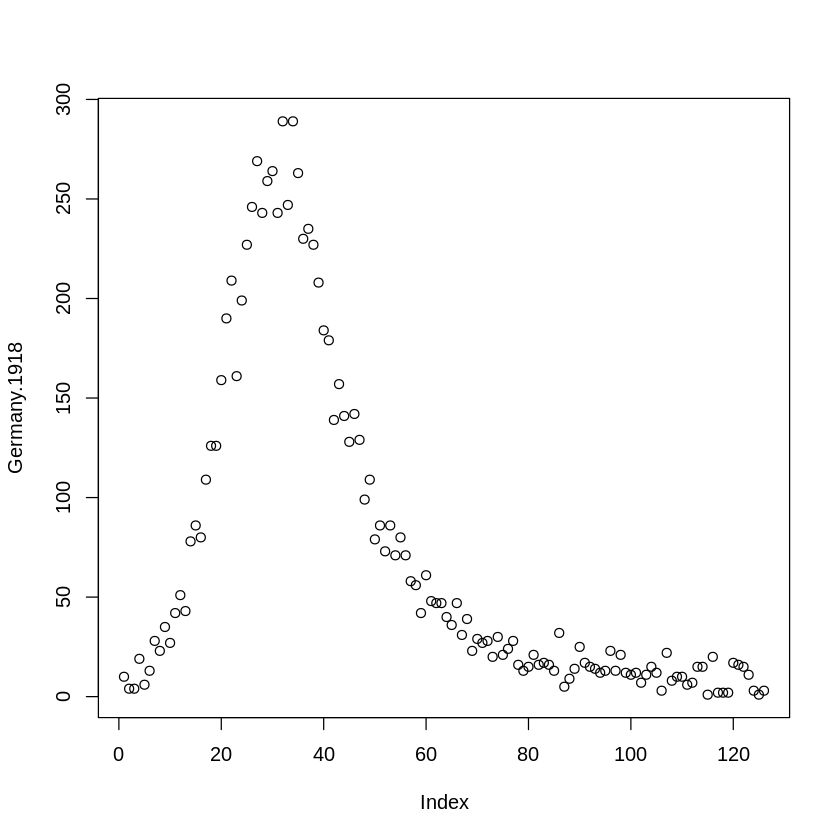

In [100]:
plot(Germany.1918)


e.R0.T> #Loading package
e.R0.T> library(R0)

e.R0.T> ## Data is taken from the paper by Nishiura for key transmission parameters of an institutional
e.R0.T> ## outbreak during 1918 influenza pandemic in Germany)
e.R0.T> 
e.R0.T> data(Germany.1918)

e.R0.T> mGT<-generation.time("gamma", c(3, 1.5))

e.R0.T> TD <- est.R0.TD(Germany.1918, mGT, begin=1, end=126, nsim=100)


Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(Germany.1918, mGT, begin = 1, end = 126, nsim = 100):
“Using initial incidence as initial number of cases.”



e.R0.T> # Warning messages:
e.R0.T> # 1: In est.R0.TD(Germany.1918, mGT) : Simulations may take several minutes.
e.R0.T> # 2: In est.R0.TD(Germany.1918, mGT) : Using initial incidence as initial number of cases.
e.R0.T> TD
Reproduction number estimate using  Time-Dependent  method.
2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...


e.R0.T> # Reproduction number estimate using  Time-Dependent  method.
e.R0.T> # 2.322239 2.272013 1.998474 1.843703 2.019297 1.867488 1.644993 1.553265 1.553317 1.601317 ...
e.R0.T> 
e.R0.T> ## An interesting way to look at these results is to agregate initial data by longest time unit,
e.R0.T> ## such as weekly incidence. This gives a global overview of the epidemic.
e.R0.T> TD.weekly <- smooth.Rt(TD, 7)

e.R0.T> TD.weekly
Reproduction number estimate using  Time-Dependent  method.
1.878424 1.580976 1.356918 1.131633 0.9615463 0.8118902 0.8045254 0.8395747 0.8542518 0.8258094 ...


e.R0.T> # Reproduction number 

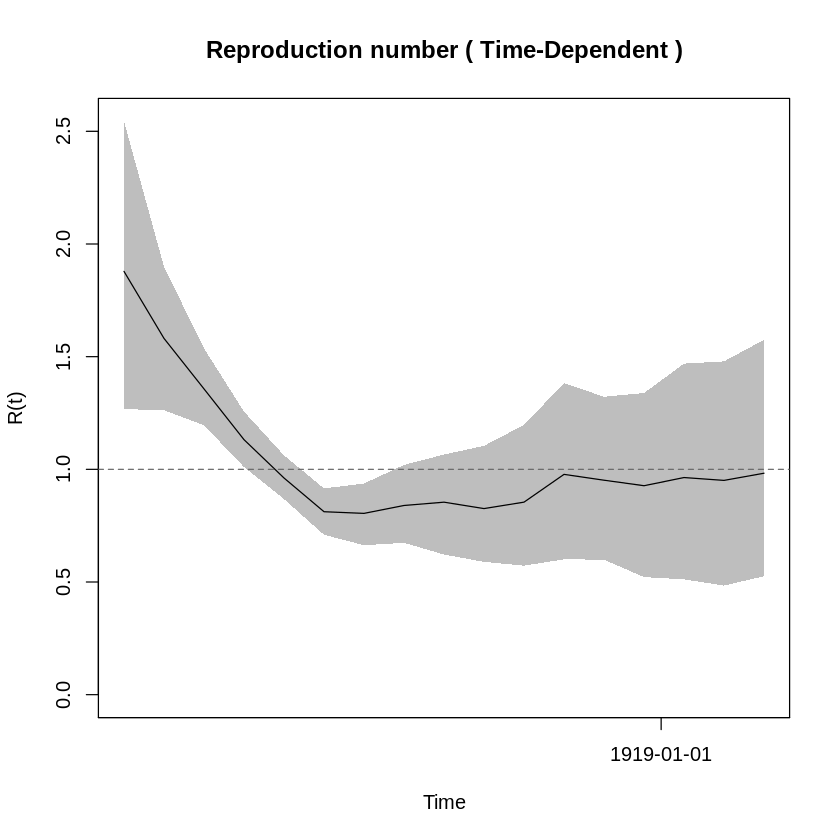

In [101]:
example(est.R0.TD)

In [102]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

List of 14
 $ R          : num [1:99] 0 0 2.22 0.66 1.2 1.84 1.43 1.63 1.34 1.52 ...
 $ conf.int   :'data.frame':	99 obs. of  2 variables:
  ..$ CI.lower.: num [1:99] 0.01 0.01 0.97 0.05 0.31 1.11 0.8 1.1 0.85 1.09 ...
  ..$ CI.upper.: num [1:99] 1.62 1.59 3.26 1.63 2.02 2.49 2 2.13 1.79 1.93 ...
 $ proba.Rt   :List of 100
  ..$ : num [1:4601] 0.000217 0.000217 0.000217 0.000217 0.000217 ...
  ..$ : num [1:4601] 0.0152 0.0151 0.0149 0.0148 0.0146 ...
  ..$ : num [1:4601] 0.0136 0.0135 0.0134 0.0133 0.0132 ...
  ..$ : num [1:4601] 2.03e-05 2.13e-05 2.23e-05 2.33e-05 2.44e-05 ...
  ..$ : num [1:4601] 0.00419 0.00428 0.00437 0.00446 0.00455 ...
  ..$ : num [1:4601] 0.000359 0.000378 0.000397 0.000417 0.000438 ...
  ..$ : num [1:4601] 1.32e-07 1.48e-07 1.65e-07 1.85e-07 2.06e-07 ...
  ..$ : num [1:4601] 1.06e-06 1.19e-06 1.34e-06 1.52e-06 1.71e-06 ...
  ..$ : num [1:4601] 1.27e-09 1.53e-09 1.83e-09 2.19e-09 2.63e-09 ...
  ..$ : num [1:4601] 2.00e-08 2.41e-08 2.91e-08 3.51e-08 4.22e-08 ...


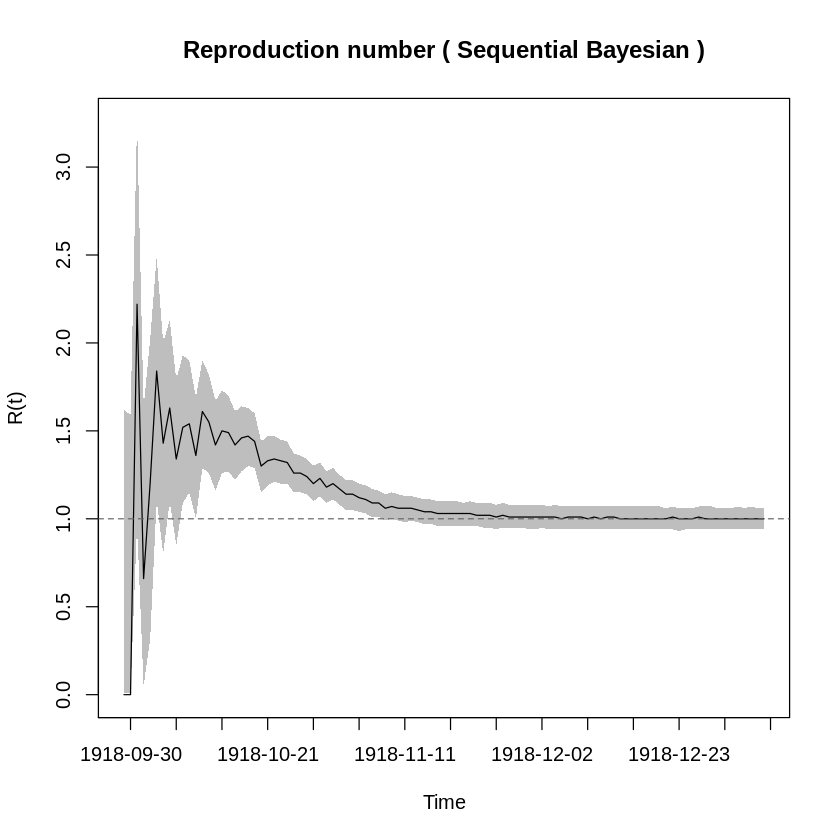

In [103]:
plot(SB)

### Estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [104]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

,Tennessee,Georgia,Alabama,Florida,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
4/4/20,255,329,119,1269,2020-04-04
4/5/20,311,487,151,813,2020-04-05
4/6/20,169,667,187,974,2020-04-06
4/7/20,337,1508,217,1221,2020-04-07
4/8/20,224,1079,159,911,2020-04-08
4/9/20,271,665,375,908,2020-04-09


In [105]:
length(tb_sub[,1])

[1] 181

In [106]:
mGT<-generation.time("gamma", c(5, 1.5))
mGT

Discretized Generation Time distribution
mean: 4.999765 , sd: 1.526835 
 [1] 0.0000000000 0.0006003464 0.0240149896 0.1294177453 0.2495603758
 [6] 0.2599966046 0.1807711004 0.0946112317 0.0401491572 0.0145052741
[11] 0.0046144103 0.0013241718 0.0003489722 0.0000856206


In [107]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=181, nsim=100)

Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 181, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tb_sub$Tennessee, mGT, begin = 1, end = 181, nsim = 100):
“Using initial incidence as initial number of cases.”


In [108]:
#str(TD)
length(tb_sub[,1])

[1] 181

In [109]:
tb_sub$Rt = TD$R

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



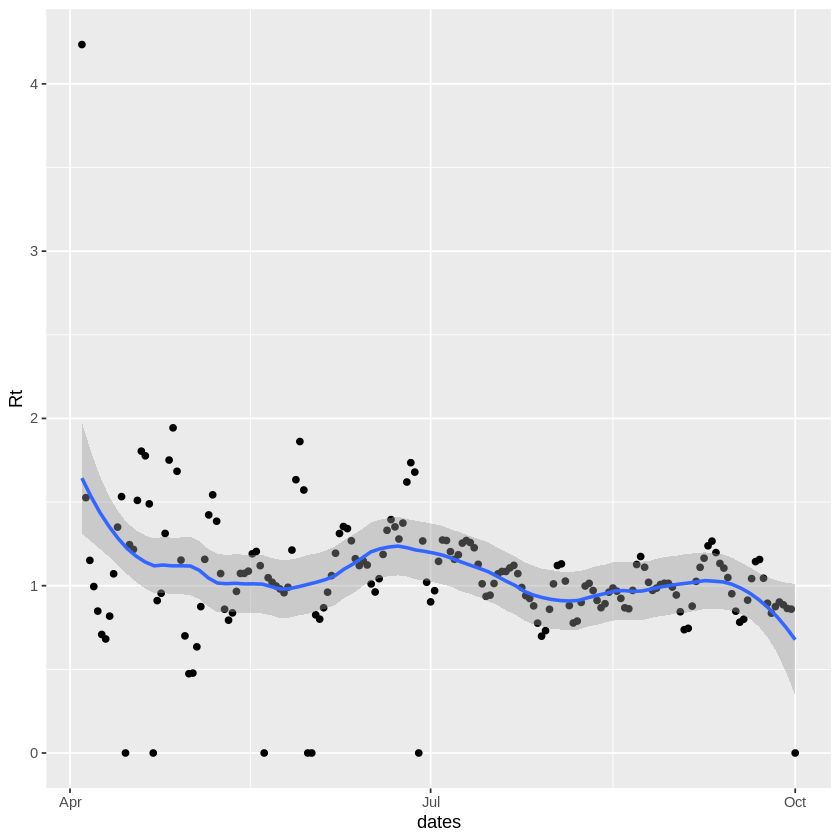

In [110]:
ggplot( tb_sub, aes(x=dates, y=Rt) ) +
   geom_point() + 
   stat_smooth( span=0.3)

## How about Hamilton County, TN? 

In [111]:
install.packages('R0')
library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [124]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

Parsed with column specification:
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)

See spec(...) for full column specifications.



### Select Hamilton, Tennessee, US

In [125]:
names(tb1) [grep(  "Tennessee", names(tb1))]

[1] "Anderson, Tennessee, US"   "Bedford, Tennessee, US"   
 [3] "Benton, Tennessee, US"     "Bledsoe, Tennessee, US"   
 [5] "Blount, Tennessee, US"     "Bradley, Tennessee, US"   
 [7] "Campbell, Tennessee, US"   "Cannon, Tennessee, US"    
 [9] "Carroll, Tennessee, US"    "Carter, Tennessee, US"    
[11] "Cheatham, Tennessee, US"   "Chester, Tennessee, US"   
[13] "Claiborne, Tennessee, US"  "Clay, Tennessee, US"      
[15] "Cocke, Tennessee, US"      "Coffee, Tennessee, US"    
[17] "Crockett, Tennessee, US"   "Cumberland, Tennessee, US"
[19] "Davidson, Tennessee, US"   "DeKalb,Tennessee,US"      
[21] "Decatur, Tennessee, US"    "Dickson, Tennessee, US"   
[23] "Dyer, Tennessee, US"       "Fayette, Tennessee, US"   
[25] "Fentress, Tennessee, US"   "Franklin, Tennessee, US"  
[27] "Gibson, Tennessee, US"     "Giles, Tennessee, US"     
[29] "Grainger, Tennessee, US"   "Greene, Tennessee, US"    
[31] "Grundy, Tennessee, US"     "Hamblen, Tennessee, US"   
[33] "Hamilton, Tennessee, US"   "Hancock, Tennessee, US"   
[35] "Hardeman, Tennessee, US"   "Hardin, Tennessee, US"    
[37] "Hawkins, Tennessee, US"    "Haywood, Tennessee, US"   
[39] "Henderson, Tennessee, US"  "Henry, Tennessee, US"     
[41] "Hickman, Tennessee, US"    "Houston, Tennessee, US"   
[43] "Humphreys, Tennessee, US"  "Jackson, Tennessee, US"   
[45] "Jefferson, Tennessee, US"  "Johnson, Tennessee, US"   
[47] "Knox, Tennessee, US"       "Lake, Tennessee, US"      
[49] "Lauderdale, Tennessee, US" "Lawrence, Tennessee, US"  
[51] "Lewis, Tennessee, US"      "Lincoln, Tennessee, US"   
[53] "Loudon, Tennessee, US"     "Macon, Tennessee, US"     
[55] "Madison, Tennessee, US"    "Marion, Tennessee, US"    
[57] "Marshall, Tennessee, US"   "Maury, Tennessee, US"     
[59] "McMinn, Tennessee, US"     "McNairy, Tennessee, US"   
[61] "Meigs, Tennessee, US"      "Monroe, Tennessee, US"    
[63] "Montgomery, Tennessee, US" "Moore, Tennessee, US"     
[65] "Morgan, Tennessee, US"     "Obion, Tennessee, US"     
[67] "Out of TN, Tennessee, US"  "Overton, Tennessee, US"   
[69] "Perry, Tennessee, US"      "Pickett, Tennessee, US"   
[71] "Polk, Tennessee, US"       "Putnam, Tennessee, US"    
[73] "Rhea, Tennessee, US"       "Roane, Tennessee, US"     
[75] "Robertson, Tennessee, US"  "Rutherford, Tennessee, US"
[77] "Scott, Tennessee, US"      "Sequatchie, Tennessee, US"
[79] "Sevier, Tennessee, US"     "Shelby, Tennessee, US"    
[81] "Smith, Tennessee, US"      "Stewart, Tennessee, US"   
[83] "Sullivan, Tennessee, US"   "Sumner, Tennessee, US"    
[85] "Tipton, Tennessee, US"     "Trousdale, Tennessee, US" 
[87] "Unassigned, Tennessee, US" "Unicoi, Tennessee, US"    
[89] "Union, Tennessee, US"      "Van Buren, Tennessee, US" 
[91] "Warren, Tennessee, US"     "Washington, Tennessee, US"
[93] "Wayne, Tennessee, US"      "Weakley, Tennessee, US"   
[95] "White, Tennessee, US"      "Williamson, Tennessee, US"
[97] "Wilson, Tennessee, US"

In [126]:
window = 190

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

'data.frame':	190 obs. of  3 variables:
 $ Hamilton, Tennessee, US: num  30 30 35 35 35 50 50 61 67 71 ...
 $ Davidson, Tennessee, US: num  293 312 376 394 443 541 673 785 685 741 ...
 $ dates                  : Date, format: "2020-03-26" "2020-03-27" ...


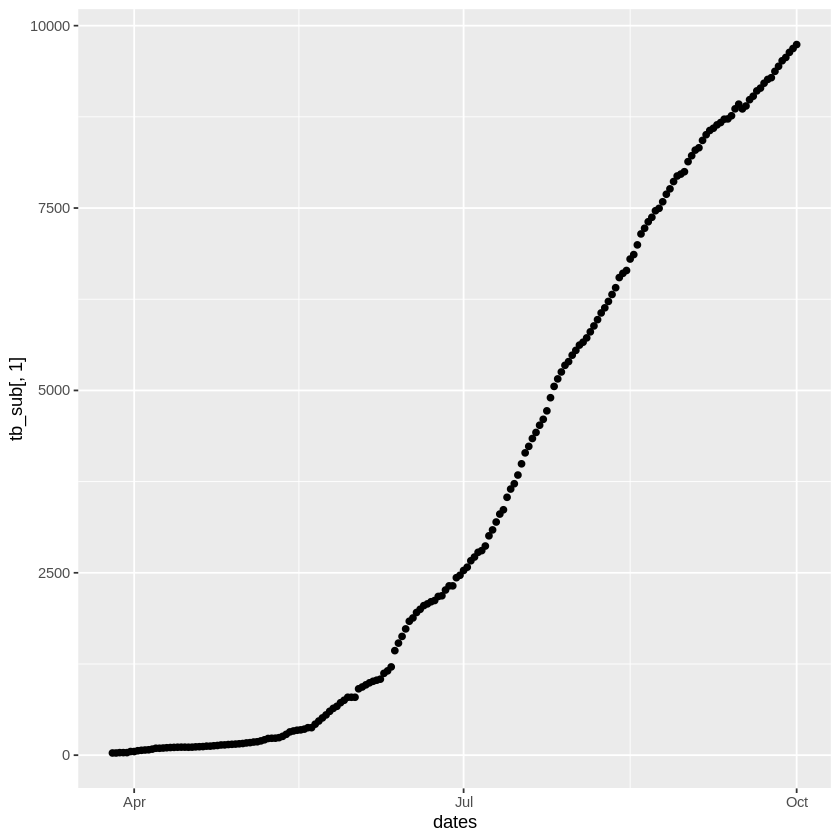

In [116]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [117]:
head(tb_sub)

,"Hamilton, Tennessee, US","Davidson, Tennessee, US",dates
,<dbl>,<dbl>,<date>
3/26/20,30,293,2020-03-26
3/27/20,30,312,2020-03-27
3/28/20,35,376,2020-03-28
3/29/20,35,394,2020-03-29
3/30/20,35,443,2020-03-30
3/31/20,50,541,2020-03-31


### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [118]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

,Hamilton..Tennessee..US,Davidson..Tennessee..US
,<dbl>,<dbl>
3/27/20,0,19
3/28/20,5,64
3/29/20,0,18
3/30/20,0,49
3/31/20,15,98
4/1/20,0,132
4/2/20,11,112
4/3/20,6,-100
4/4/20,4,56


In [119]:
wday(mdy('3/31/20'))

[1] 3

In [120]:
tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

### Estimate Rt for Hamilton, TN

In [121]:
mGT<-generation.time("gamma", c(5, 1.5))
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)

[1] 193

In [129]:
start = 1
stop = length(x)-5 # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin= start, end= stop, nsim=100) 

Warning message in est.R0.TD(x, mGT, begin = start, end = stop, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(x, mGT, begin = start, end = stop, nsim = 100):
“Using initial incidence as initial number of cases.”


ERROR: ignored

In [128]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, 1))

ERROR: ignored

In [130]:
head(tb_daily_sub)

,Hamilton..Tennessee..US,Davidson..Tennessee..US
,<dbl>,<dbl>
3/27/20,0,19
3/28/20,5,64
3/29/20,5,18
3/30/20,5,49
3/31/20,15,98
4/1/20,0,132


In [ ]:
tail(tb_daily_sub)

In [ ]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ (number_of_rows-5) :number_of_rows] = NA

In [ ]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y=log10(RtHamilton)) ) +
  geom_point() +
  stat_smooth(span=.35) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

For policy and new related to Covid19 at Hamitlon, TN, see http://health.hamiltontn.org/AllServices/Coronavirus(COVID-19)/PressReleases.aspx  <br> 

March 13, first case. <br> 

April 27, governor order restaraunt reopenning. <br> 

July 4th, holiday weekend. If it happended to Hamilton, it might happend to other counties with similar densities? The TN state did show a spike after 4 of July <br> 


In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y= tb_daily_sub[,1] )) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Daily confirmed cases at Hamilton, TN")

### Can we remove some noises in Rt? 

In [ ]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

In [ ]:
plot( predict( loessSpan04))

In [ ]:
#str(loessSpan04)

In [ ]:
plot(loessSpan04$fitted)

### Nashville counties (todo)

### Memphis counties


### Knoxville

# Part 4. Does the weather correlared with Covid19 at Hamilton County?  

### Get weather data from Lovell airport

In [131]:
install.packages("worldmet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘jpeg’, ‘maps’, ‘gridExtra’, ‘latticeExtra’, ‘mapproj’, ‘hexbin’, ‘iterators’, ‘png’, ‘raster’, ‘sp’, ‘viridis’, ‘leaflet.providers’, ‘openair’, ‘doParallel’, ‘foreach’, ‘leaflet’, ‘zoo’




In [132]:
library(worldmet)

In [133]:
getMeta(site = "LOVELL")

usaf,wban,station,ctry,st,call,latitude,longitude,elev(m),begin,end,code,dist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>,<lgl>
723240,13882,LOVELL FIELD AIRPORT,US,TN,KCHA,35.034,-85.2,204.2,1973-01-01,2020-09-30,723240-13882,NA


In [134]:
info <- getMeta(lat = 35, lon = -85) #Chattanooga TN
info

usaf,wban,station,ctry,st,call,latitude,longitude,elev(m),begin,end,code,longr,latr,dist
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>,<dbl>,<dbl>,<dbl>
723240,13882,LOVELL FIELD AIRPORT,US,TN,KCHA,35.034,-85.200,204.2,1973-01-01,2020-09-30,723240-13882,-1.487021,0.6114587,18.60156
722154,53885,DALTON MUNICIPAL AIRPORT,US,GA,KDNN,34.722,-84.869,216.4,2006-01-01,2020-09-30,722154-53885,-1.481243,0.6060132,33.14247
723200,93801,RICHARD B RUSSELL AIRPORT,US,GA,KRMG,34.348,-85.161,194.8,1978-01-01,2020-09-30,723200-93801,-1.486340,0.5994857,73.97890
999999,63862,VALLEY HEAD 1 SSW,US,AL,NA,34.565,-85.617,310.9,2006-05-04,2020-09-29,999999-63862,-1.494299,0.6032731,74.26151
A00013,63847,ISBELL FIELD AIRPORT,US,AL,K4A9,34.474,-85.721,267.3,2006-01-01,2020-09-29,A00013-63847,-1.496114,0.6016848,88.09877
722109,00355,CHEROKEE COUNTY AIRPORT,US,GA,KCNI,34.317,-84.417,372.2,2005-01-01,2020-09-30,722109-00355,-1.473355,0.5989446,92.79616
720409,99999,BLAIRSVILLE AIRPORT,US,GA,KDZJ,34.850,-83.983,582.0,2008-01-01,2020-09-29,720409-99999,-1.465780,0.6082472,94.20665
999999,63896,SCOTTSBORO 2 NE,US,AL,NA,34.694,-86.000,193.9,2006-08-16,2020-09-29,999999-63896,-1.500983,0.6055245,97.39199
720856,00284,SCOTTSBORO MUNICIPAL AIRPORT WORD FIELD,US,AL,K4A6,34.689,-86.006,198.1,2010-11-30,2020-09-29,720856-00284,-1.501088,0.6054373,98.10241


In [135]:
weatherLovell <- importNOAA(code = "723240-13882", year = 2020)
head(weatherLovell)

code,station,date,latitude,longitude,elev,ws,wd,air_temp,atmos_pres,⋯,cl_1,cl_2,cl_3,cl,cl_1_height,cl_2_height,cl_3_height,precip_6,precip,pwc
<fct>,<fct>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 00:00:00,35.03362,-85.20044,204.2,2.85,214.5603,8.05,1016.2,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 01:00:00,35.03362,-85.20044,204.2,2.10,230.0000,7.80,1016.7,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 02:00:00,35.03362,-85.20044,204.2,2.10,220.0000,6.70,1016.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 03:00:00,35.03362,-85.20044,204.2,2.10,250.0000,6.10,1017.6,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 04:00:00,35.03362,-85.20044,204.2,2.60,260.0000,6.10,1017.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA
723240-13882,"CHATTANOOGA AIRPORT, TN US",2020-01-01 05:00:00,35.03362,-85.20044,204.2,1.50,280.0000,4.40,1017.8,⋯,0,NA,NA,0,NA,NA,NA,NA,0,NA


In [136]:
names(weatherLovell)

[1] "code"        "station"     "date"        "latitude"    "longitude"  
 [6] "elev"        "ws"          "wd"          "air_temp"    "atmos_pres" 
[11] "visibility"  "dew_point"   "RH"          "ceil_hgt"    "cl_1"       
[16] "cl_2"        "cl_3"        "cl"          "cl_1_height" "cl_2_height"
[21] "cl_3_height" "precip_6"    "precip"      "pwc"

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'

Warning message:
“Removed 10 rows containing non-finite values (stat_smooth).”


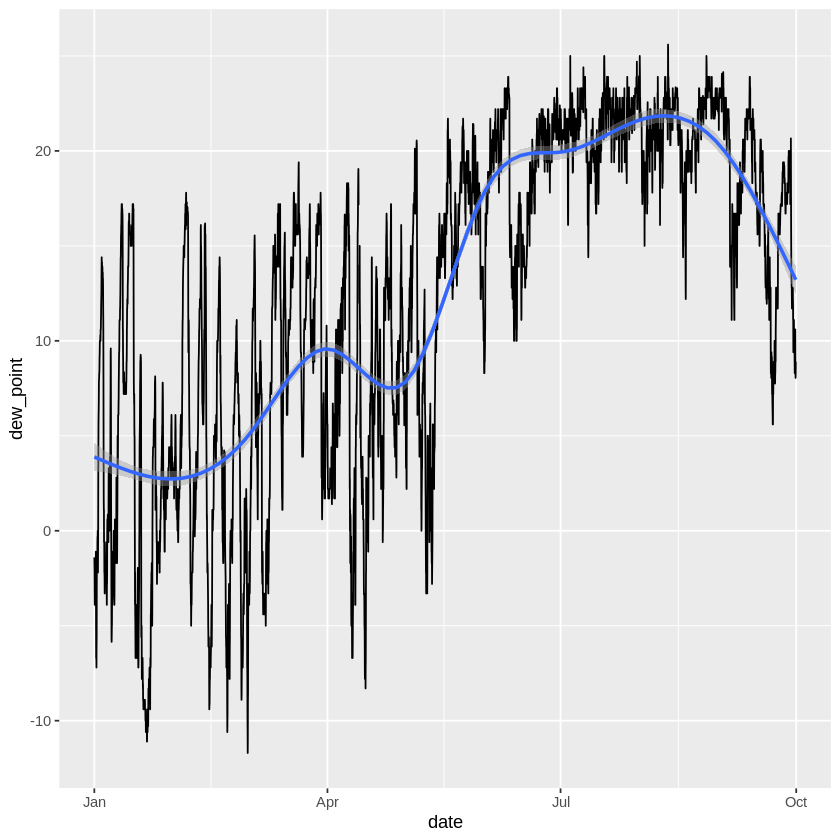

In [137]:
library(ggplot2)
ggplot(weatherLovell, aes(x=date,y=dew_point)) + geom_line() + stat_smooth(span=0.3)

In [139]:
weatherLovell2 <- weatherLovell %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))

### Reformate dates

In [140]:
library(lubridate)

In [141]:
clean_dates = gsub( " UTC ", "", weatherLovell2$date)

weatherLovell2$YMD = as.Date(clean_dates)
head(weatherLovell2$YMD)

[1] "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01" "2020-01-01"
[6] "2020-01-01"

In [142]:
weatherLovell3 <- weatherLovell2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

head( weatherLovell3 )

YMD,air_temp,dew_point,RH
<date>,<dbl>,<dbl>,<dbl>
2020-01-01,6.135417,-3.406250,55.57241
2020-01-02,8.152083,2.459028,70.09230
2020-01-03,11.631052,11.136458,96.83876
2020-01-04,11.440972,7.850000,80.65194
2020-01-05,5.883333,-2.272917,57.84938
2020-01-06,7.137500,0.787500,67.79407


### Plot weather

,YMD,WeatherConditions,Measurements
,<date>,<fct>,<dbl>
1,2020-01-01,air_temp,6.135417
2,2020-01-02,air_temp,8.152083
3,2020-01-03,air_temp,11.631052
4,2020-01-04,air_temp,11.440972
5,2020-01-05,air_temp,5.883333
6,2020-01-06,air_temp,7.137500


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



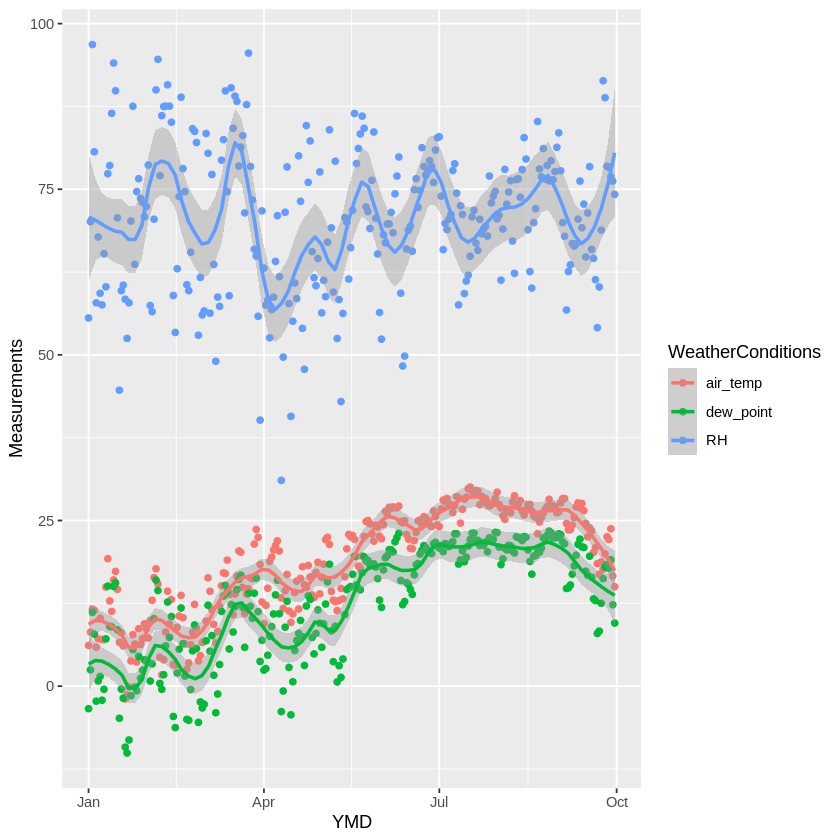

In [143]:
df_tmp <- melt(weatherLovell3, measure.vars = c("air_temp", "dew_point", "RH"), value.name = 'Measurements', variable.name = 'WeatherConditions')
head(df_tmp)
ggplot(df_tmp, aes(x=YMD, y=Measurements, color=WeatherConditions)) + geom_point() + stat_smooth(span=0.15)

### Merge weather data with Covid19 data for Hamilton, TN

In [144]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))

head(tb_daily_sub)

,Hamilton..Tennessee..US,Davidson..Tennessee..US,YMD
,<dbl>,<dbl>,<date>
3/27/20,0,19,2020-03-27
3/28/20,5,64,2020-03-28
3/29/20,0,18,2020-03-29
3/30/20,0,49,2020-03-30
3/31/20,15,98,2020-03-31
4/1/20,0,132,2020-04-01


In [145]:
tb_HCTN =   merge(x=tb_daily_sub, y=weatherLovell3, by= 'YMD', all.y=FALSE)
tail(tb_HCTN)

,YMD,Hamilton..Tennessee..US,Davidson..Tennessee..US,air_temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
183,2020-09-25,87,129,19.96069,17.987222,88.81983
184,2020-09-26,69,93,22.53542,18.319792,78.47500
185,2020-09-27,76,156,22.12500,17.791667,78.28671
186,2020-09-28,45,55,23.74972,19.076806,76.90204
187,2020-09-29,70,112,16.62361,12.282639,76.23120
188,2020-09-30,53,77,15.00714,9.516667,74.21640


In [146]:
tb_HCTN2 <- tb_HCTN %>% 
  dplyr::select( c(1,2,4:6)) %>%
  dplyr::filter( between(YMD, mdy('4/1/20'), mdy('9/28/20')))
  
names(tb_HCTN2) = c("date", "dailyCases", "temp", "dew_point", "RH")
head( tb_HCTN2 )

tb_HCTN2$dailyCases[ tb_HCTN2$dailyCases<0 ] = 0

,date,dailyCases,temp,dew_point,RH
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-04-01,0,9.42500,2.412500,63.10068
2,2020-04-02,11,12.19211,2.652632,57.49857
3,2020-04-03,6,14.77500,4.666667,58.25275
4,2020-04-04,4,18.81875,7.522917,52.58768
5,2020-04-05,3,19.48542,8.983333,56.82087
6,2020-04-06,9,20.55417,10.893750,58.70959


### plot cases and weather

,dailyCases,temp,dew_point,RH,date
,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1,-1.1749091,-2.6699020,-2.2259203,-0.6729582,2020-04-01
2,-0.9307291,-2.1265938,-2.1879798,-1.2475120,2020-04-02
3,-1.0417200,-1.6194545,-1.8697652,-1.1701636,2020-04-03
4,-1.0861164,-0.8254831,-1.4184819,-1.7511746,2020-04-04
5,-1.1083145,-0.6945862,-1.1877382,-1.3170179,2020-04-05
6,-0.9751255,-0.4847421,-0.8858952,-1.1233102,2020-04-06


,dew_point,RH,date,Types,Measurements
,<dbl>,<dbl>,<date>,<fct>,<dbl>
1,-2.2259203,-0.6729582,2020-04-01,dailyCases,-1.1749091
2,-2.1879798,-1.2475120,2020-04-02,dailyCases,-0.9307291
3,-1.8697652,-1.1701636,2020-04-03,dailyCases,-1.0417200
4,-1.4184819,-1.7511746,2020-04-04,dailyCases,-1.0861164
5,-1.1877382,-1.3170179,2020-04-05,dailyCases,-1.1083145
6,-0.8858952,-1.1233102,2020-04-06,dailyCases,-0.9751255


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



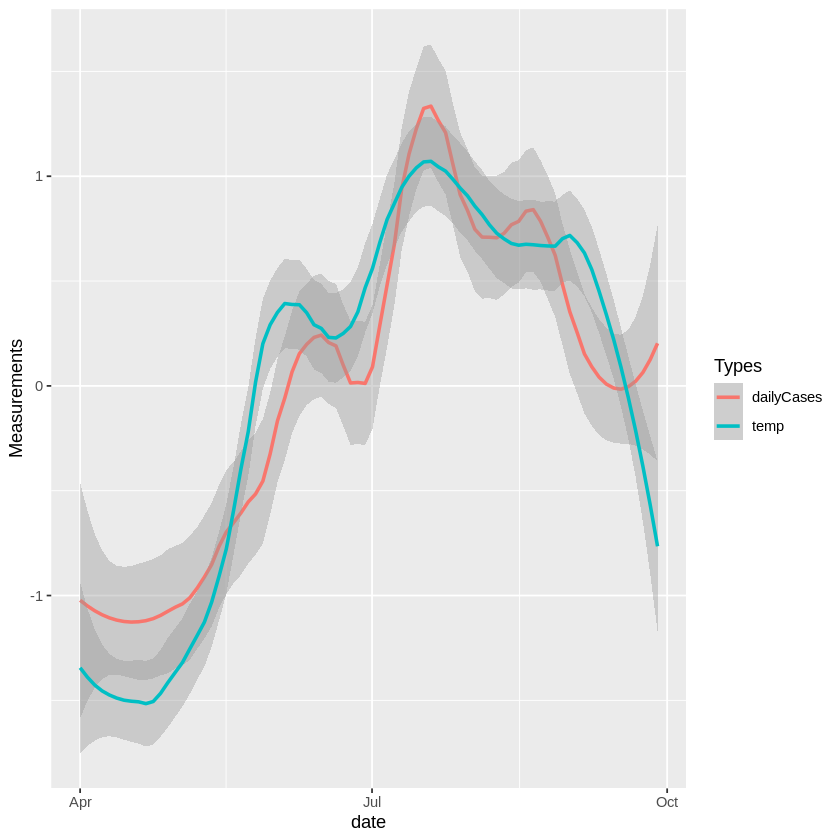

In [147]:
tb_HCTN2_scaled = data.frame( as.matrix(scale(tb_HCTN2[,2:5])) )
tb_HCTN2_scaled$date = tb_HCTN2$date
head(tb_HCTN2_scaled)

#df_tmp <- melt(tb_HCTN2_scaled, measure.vars = c("dailyCases", "temp", "dew_point", "RH"), value.name = 'Measurements', variable.name = 'Types')
df_tmp <- melt(tb_HCTN2_scaled, measure.vars = c("dailyCases", "temp"), value.name = 'Measurements', variable.name = 'Types')
head(df_tmp)
ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)

In [ ]:
scale(tb_HCTN2[,2:5])

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



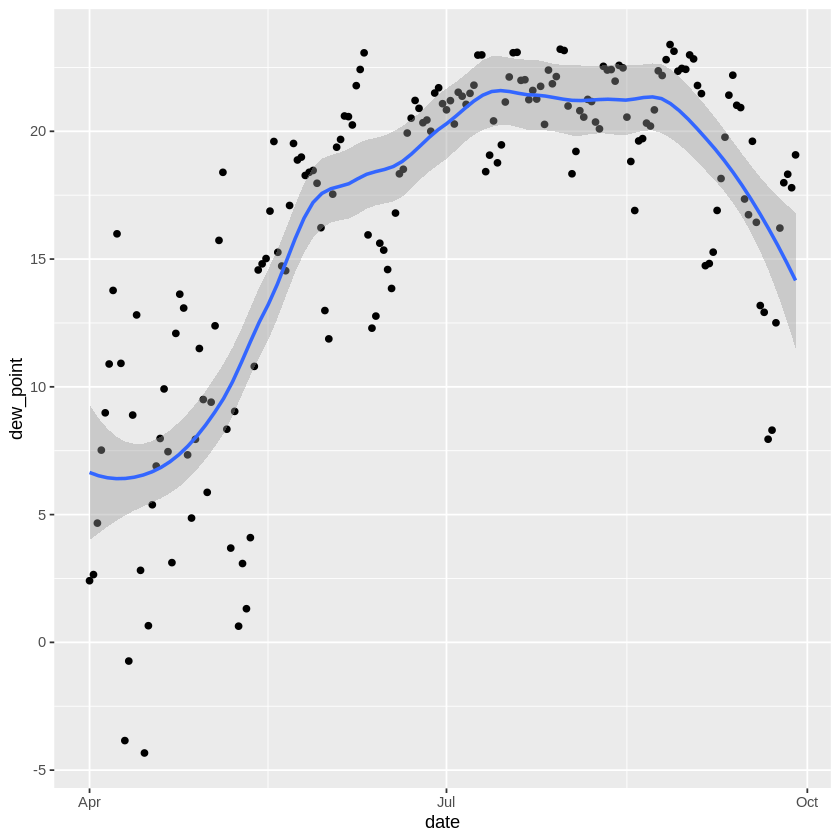

In [148]:
ggplot(tb_HCTN2, aes(x=date,y=dew_point)) + geom_point() + stat_smooth(span=0.4)

In [ ]:
ggplot(tb_HCTN2, aes(x=date,y=RH)) + geom_point() + stat_smooth(span=0.2)

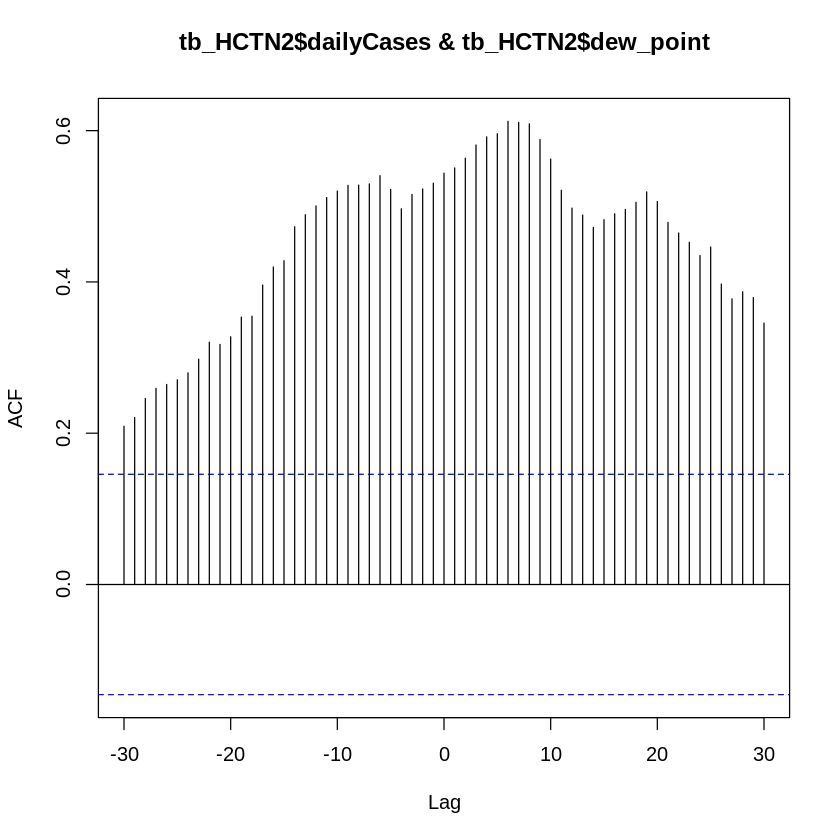

In [149]:
ccf( tb_HCTN2$dailyCases, tb_HCTN2$dew_point, lag.max=30, type="correlation", na.action = na.pass)

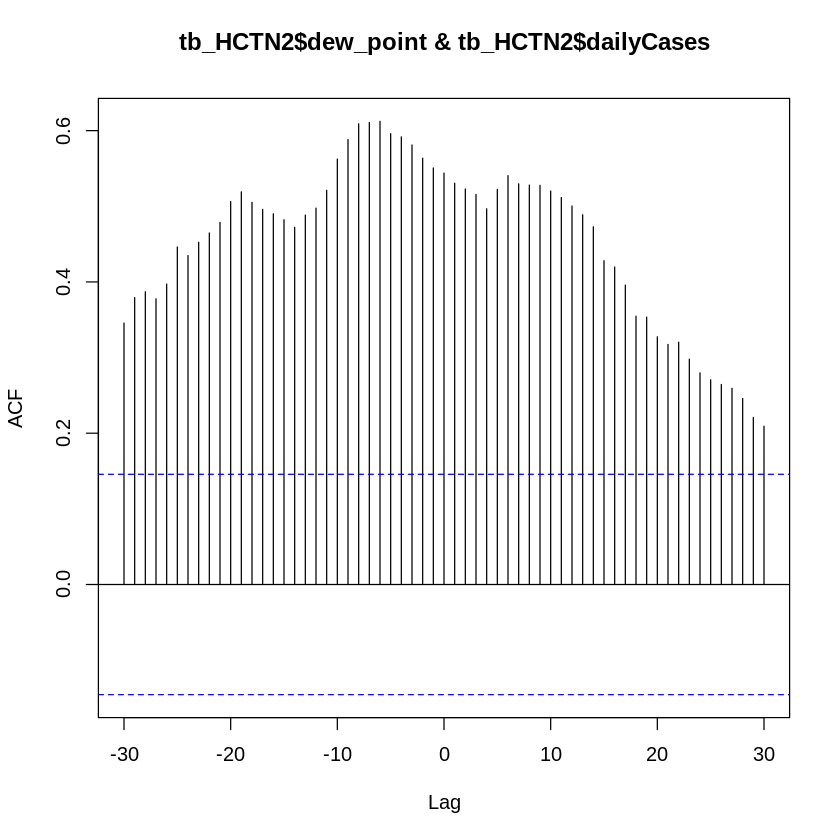

In [150]:
ccf( tb_HCTN2$dew_point, tb_HCTN2$dailyCases,  lag.max=30, type="correlation", na.action = na.pass)

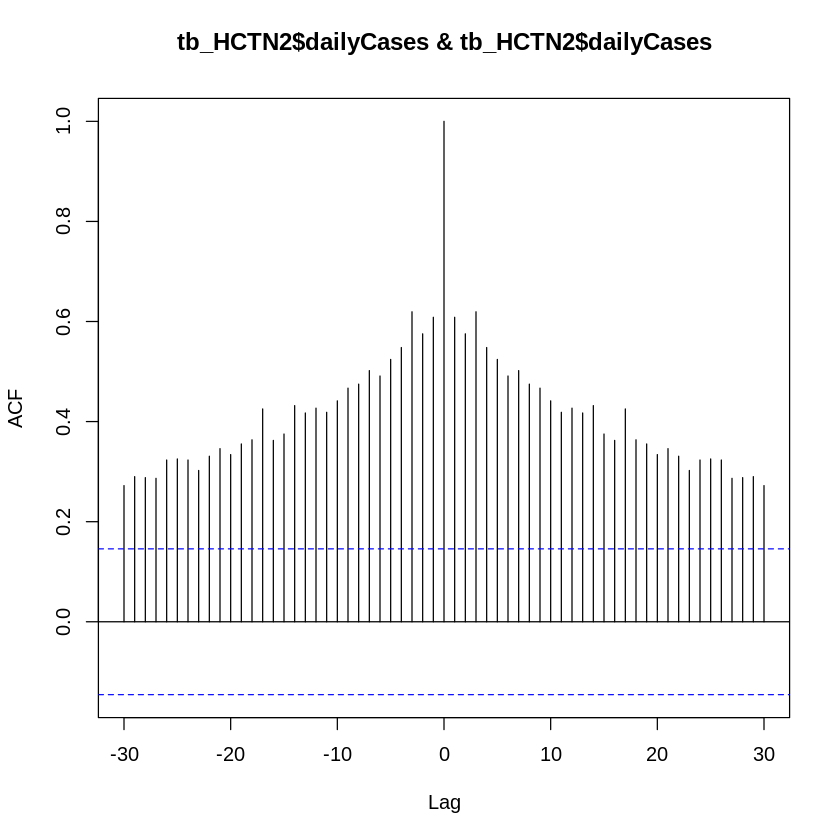

In [151]:
ccf( tb_HCTN2$dailyCases, tb_HCTN2$dailyCases,  lag.max=30, type="correlation", na.action = na.pass)

In [2]:
ccf( tb_HCTN2[,2], tb_HCTN2$RH, lag.max=30, type="correlation")

ERROR: ignored

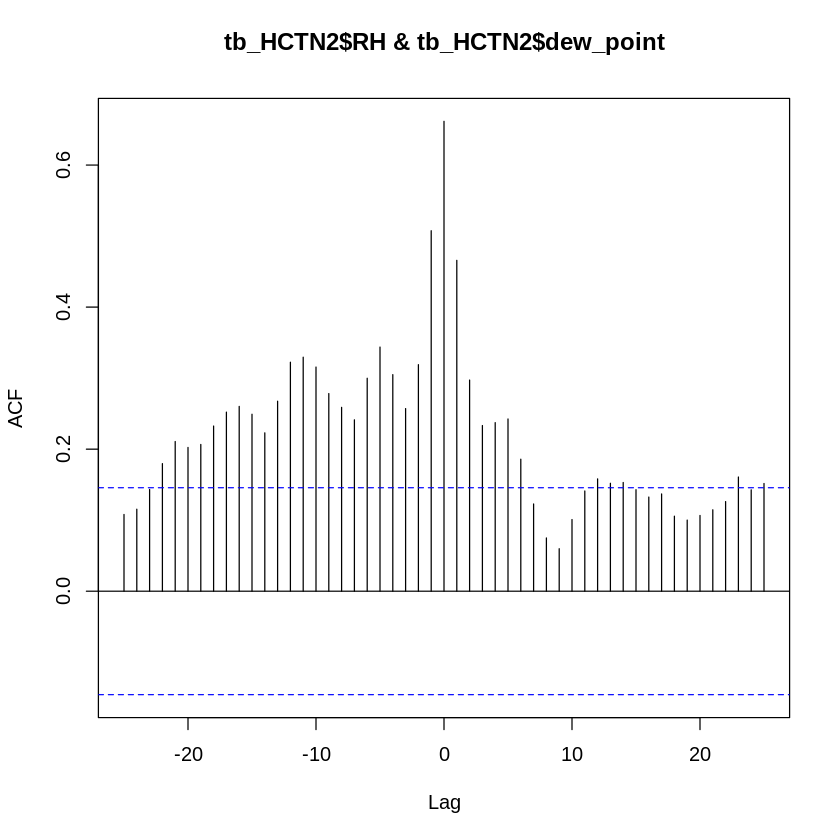

In [362]:
ccf( tb_HCTN2$RH, tb_HCTN2$dew_point, lag.max=25, type="correlation") #RH and dew_point is highly correlated

In [360]:
acf(tb_HCTN$temp,  type="correlation")

ERROR: ignored

List of 6
 $ acf   : num [1:51, 1, 1] 0.298 0.313 0.349 0.37 0.368 ...
 $ type  : chr "correlation"
 $ n.used: int 181
 $ lag   : num [1:51, 1, 1] -25 -24 -23 -22 -21 -20 -19 -18 -17 -16 ...
 $ series: chr "X"
 $ snames: chr "tb_HCTN2[, 2] & tb_HCTN2$temp"
 - attr(*, "class")= chr "acf"


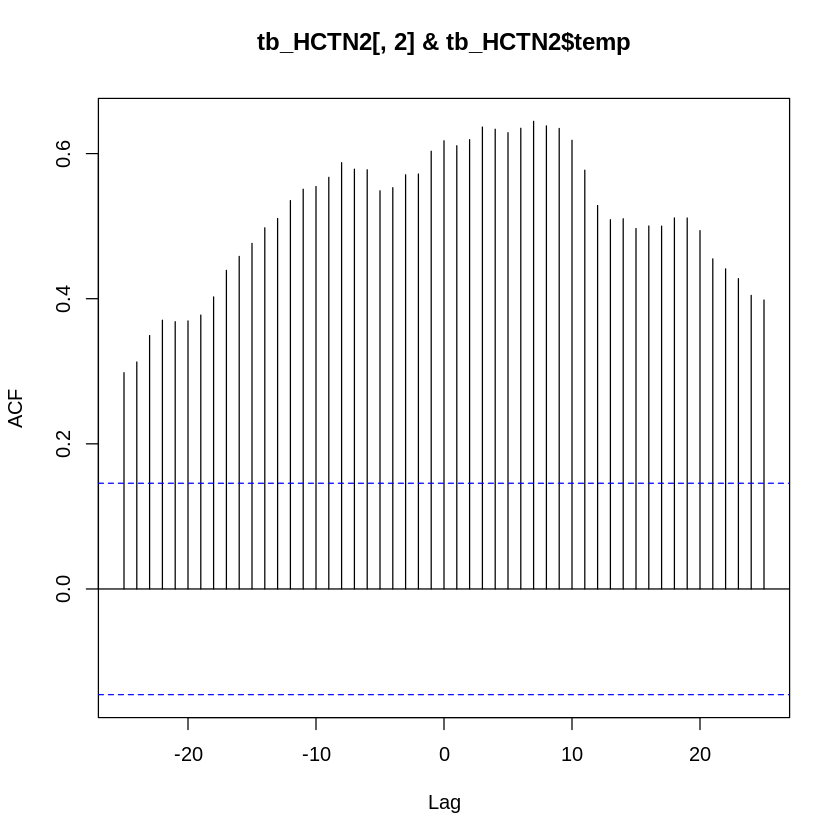

In [348]:
obj = ccf( tb_HCTN2[,2], tb_HCTN2$temp, lag.max=25, type="correlation")
str(obj)

In [290]:
?merge


# Part 5a. Canada Covid19 data analysis

### pre-process

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

Parsed with column specification:
cols(
  .default = col_double(),
  `Province/State` = col_character(),
  `Country/Region` = col_character()
)

See spec(...) for full column specifications.



Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
NA,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
NA,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
NA,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
NA,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
NA,Antigua and Barbuda,17.06080,-61.79640,0,0,0,0,0,0,⋯,95,95,96,96,96,96,97,97,98,98


In [ ]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,Afghanistan,33.93911,67.70995,0,0,0,0,0,0,⋯,38872,38883,38919,39044,39074,39096,39145,39170,39186,39192
NA,Albania,41.15330,20.16830,0,0,0,0,0,0,⋯,11948,12073,12226,12385,12535,12666,12787,12921,13045,13153
NA,Algeria,28.03390,1.65960,0,0,0,0,0,0,⋯,49194,49413,49623,49826,50023,50214,50400,50579,50754,50914
NA,Andorra,42.50630,1.52180,0,0,0,0,0,0,⋯,1483,1564,1564,1564,1681,1681,1753,1753,1836,1836
NA,Angola,-11.20270,17.87390,0,0,0,0,0,0,⋯,3789,3848,3901,3991,4117,4236,4363,4475,4590,4672
NA,Antigua and Barbuda,17.06080,-61.79640,0,0,0,0,0,0,⋯,95,95,96,96,96,96,97,97,98,98


In [ ]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

Province,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,⋯,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,⋯,16274,16381,16381,16381,16739,16889,17032,17190,17343,17343
British Columbia,Canada,53.7267,-127.6476,0,0,0,0,0,0,⋯,7663,7842,7842,7842,8208,8304,8395,8395,8641,8641
Diamond Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
Grand Princess,Canada,0.0000,0.0000,0,0,0,0,0,0,⋯,13,13,13,13,13,13,13,13,13,13
Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,⋯,1500,1540,1558,1586,1608,1632,1674,1711,1764,1829
New Brunswick,Canada,46.5653,-66.4619,0,0,0,0,0,0,⋯,194,194,194,194,196,196,197,199,200,200


In [ ]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1/27/20,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

,Alberta,British Columbia,Diamond Princess,Grand Princess,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/12/20,19,46,0,0,0,1,0,0,0,42,0,9,0,0
3/13/20,29,64,0,2,4,1,0,0,0,74,0,17,2,0
3/14/20,29,64,0,2,4,1,0,0,0,79,0,17,2,0
3/15/20,39,73,0,2,4,2,1,0,0,104,1,24,2,0
3/16/20,56,103,0,2,7,6,1,0,5,177,1,50,7,0
3/17/20,74,103,0,8,8,8,3,0,7,185,1,74,7,0


## Convert cumulative values into daily new cases

In [ ]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

,Alberta,British.Columbia,Diamond.Princess,Grand.Princess,Manitoba,New.Brunswick,Newfoundland.and.Labrador,Northwest.Territories,Nova.Scotia,Ontario,Prince.Edward.Island,Quebec,Saskatchewan,Yukon
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3/13/20,10,18,0,2,4,0,0,0,0,32,0,8,2,0
3/14/20,0,0,0,0,0,0,0,0,0,5,0,0,0,0
3/15/20,10,9,0,0,0,1,1,0,0,25,1,7,0,0
3/16/20,17,30,0,0,3,4,0,0,5,73,0,26,5,0
3/17/20,18,0,0,6,1,2,2,0,2,8,0,24,0,0
3/18/20,23,83,0,1,7,3,0,0,5,36,0,20,1,0


In [ ]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

,Alberta,British.Columbia,Diamond.Princess,Grand.Princess,Manitoba,New.Brunswick,Newfoundland.and.Labrador,Northwest.Territories,Nova.Scotia,Ontario,Prince.Edward.Island,Quebec,Saskatchewan,Yukon,dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
3/13/20,10,18,0,2,4,0,0,0,0,32,0,8,2,0,2020-03-13
3/14/20,0,0,0,0,0,0,0,0,0,5,0,0,0,0,2020-03-14
3/15/20,10,9,0,0,0,1,1,0,0,25,1,7,0,0,2020-03-15
3/16/20,17,30,0,0,3,4,0,0,5,73,0,26,5,0,2020-03-16
3/17/20,18,0,0,6,1,2,2,0,2,8,0,24,0,0,2020-03-17
3/18/20,23,83,0,1,7,3,0,0,5,36,0,20,1,0,2020-03-18


In [ ]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

,Alberta,Ontario,dates
,<dbl>,<dbl>,<date>
9/21/20,358,492,2020-09-21
9/22/20,150,502,2020-09-22
9/23/20,143,329,2020-09-23
9/24/20,158,364,2020-09-24
9/25/20,153,529,2020-09-25
9/26/20,0,273,2020-09-26


In [ ]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,dates,State,DailyCases
,<date>,<fct>,<dbl>
1,2020-04-29,Alberta,315
2,2020-04-30,Alberta,190
3,2020-05-01,Alberta,218
4,2020-05-02,Alberta,97
5,2020-05-03,Alberta,96
6,2020-05-04,Alberta,70


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



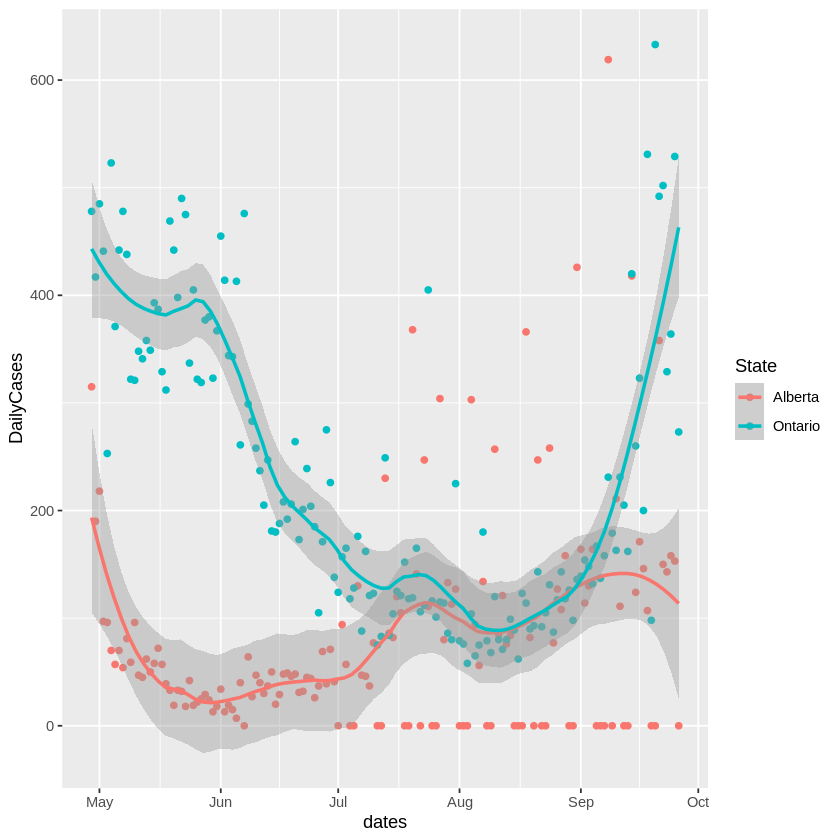

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [ ]:
install.packages('R0')
install.packages('reshape2')

library('R0')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




In [ ]:
str(tb_sub)

'data.frame':	190 obs. of  5 variables:
 $ Hamilton, Tennessee, US: num  8 12 8 26 30 30 35 35 35 50 ...
 $ Davidson, Tennessee, US: num  167 164 253 257 293 312 376 394 443 541 ...
 $ dates                  : Date, format: "2020-03-22" "2020-03-23" ...
 $ RtOntario              : num  6.13 2.61 2.04 1.88 1.87 ...
 $ RtAlberta              : num  9.05 4.14 2.73 2.1 1.83 ...


In [ ]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [ ]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Accurate confidence interval for R(t) requires a large number of simulations. Consider increasing 'nsim'”
Warning message in est.R0.TD(tmp, mGT, begin = 1, end = length(tmp) - 1 + 1, nsim = 100):
“Using initial incidence as initial number of cases.”


In [ ]:
tail(tb_sub)

,"Hamilton, Tennessee, US","Davidson, Tennessee, US",dates,RtOntario,RtAlberta
,<dbl>,<dbl>,<date>,<dbl>,<dbl>
9/22/20,9211,26087,2020-09-22,1.018350,1.032455
9/23/20,9263,26194,2020-09-23,1.019127,1.033317
9/24/20,9287,26252,2020-09-24,1.019784,1.033916
9/25/20,9374,26381,2020-09-25,1.020169,1.034239
9/26/20,9443,26474,2020-09-26,1.020239,1.034296
9/27/20,9519,26630,2020-09-27,0.000000,0.000000


In [ ]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


,dates,Rt_by_State,Rt
,<date>,<fct>,<dbl>
375,2020-09-22,RtAlberta,1.032455
376,2020-09-23,RtAlberta,1.033317
377,2020-09-24,RtAlberta,1.033916
378,2020-09-25,RtAlberta,1.034239
379,2020-09-26,RtAlberta,1.034296
380,2020-09-27,RtAlberta,NA


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


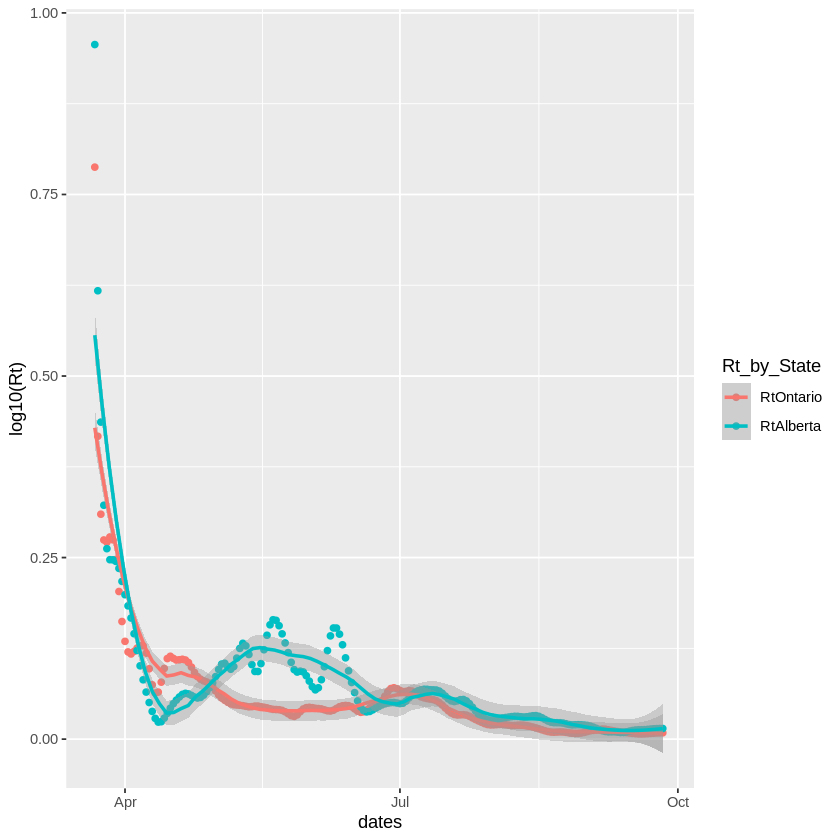

In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(Rt), color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Part 5b todo Sweeden Covid19 data analysis

# Part 6. In progress. Mobility analysis


In [ ]:
library(tidyverse)

# read directly from url
tbGM = read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)

Warning message:
“2699993 parsing failures.
 row        col           expected                  actual                                                                  file
1936 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
1937 me

In [ ]:
# get Google Mobility data through wget
system( 'wget https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv')

In [ ]:
list.files()

[1] "Global_Mobility_Report.csv"   "Global_Mobility_Report.csv.1"
[3] "sample_data"

In [ ]:
tbGM = read_csv('Global_Mobility_Report.csv')
head(tbGM)

Parsed with column specification:
cols(
  country_region_code = col_character(),
  country_region = col_character(),
  sub_region_1 = col_character(),
  sub_region_2 = col_logical(),
  metro_area = col_logical(),
  iso_3166_2_code = col_character(),
  census_fips_code = col_logical(),
  date = col_date(format = ""),
  retail_and_recreation_percent_change_from_baseline = col_double(),
  grocery_and_pharmacy_percent_change_from_baseline = col_double(),
  parks_percent_change_from_baseline = col_double(),
  transit_stations_percent_change_from_baseline = col_double(),
  workplaces_percent_change_from_baseline = col_double(),
  residential_percent_change_from_baseline = col_double()
)

Warning message:
“2699993 parsing failures.
 row        col           expected                  actual                         file
1936 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
1937 metro_area 1/0/T/F/TRUE/FALSE Kabul Metropolitan Area 'Global_Mobility_Report.csv'
1

country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-15,0,4,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-16,1,4,4,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-17,-1,1,5,1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-18,-2,1,5,0,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-19,-2,0,4,-1,2,1
AE,United Arab Emirates,NA,NA,NA,NA,NA,2020-02-20,-2,1,6,1,1,1


In [ ]:
tbGM %>% 
 distinct( country_region)

country_region
<chr>
United Arab Emirates
Afghanistan
Antigua and Barbuda
Angola
Argentina
Austria
Australia
Aruba
Bosnia and Herzegovina


In [ ]:
tbGM %>% filter( country_region == "United States")


country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
<chr>,<chr>,<chr>,<lgl>,<lgl>,<chr>,<lgl>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
US,United States,NA,NA,NA,NA,NA,2020-02-15,6,2,15,3,2,-1
US,United States,NA,NA,NA,NA,NA,2020-02-16,7,1,16,2,0,-1
US,United States,NA,NA,NA,NA,NA,2020-02-17,6,0,28,-9,-24,5
US,United States,NA,NA,NA,NA,NA,2020-02-18,0,-1,6,1,0,1
US,United States,NA,NA,NA,NA,NA,2020-02-19,2,0,8,1,1,0
US,United States,NA,NA,NA,NA,NA,2020-02-20,1,0,4,0,0,1
US,United States,NA,NA,NA,NA,NA,2020-02-21,2,-2,4,1,0,0
US,United States,NA,NA,NA,NA,NA,2020-02-22,7,3,23,5,4,-1
US,United States,NA,NA,NA,NA,NA,2020-02-23,7,3,23,5,2,-1


# Sandbox

In [ ]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [ ]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

,m,variable,value
,<fct>,<fct>,<dbl>
1,a,x,1.352522
2,b,x,1.425512
3,c,x,1.077522
4,d,x,1.253793
5,e,x,1.462105
6,f,x,1.274028


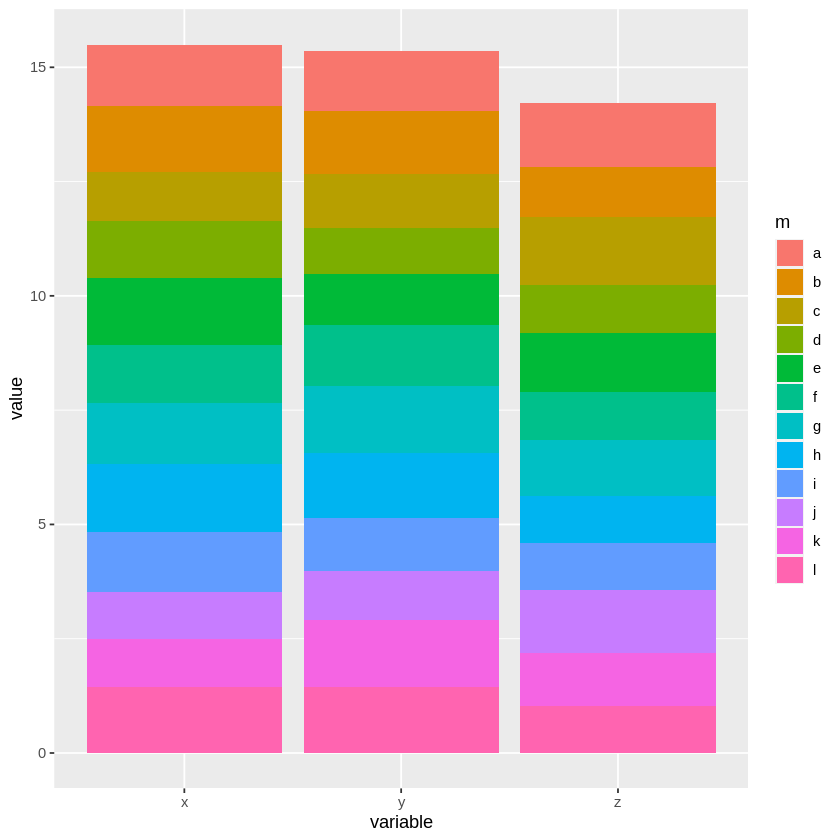

In [ ]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

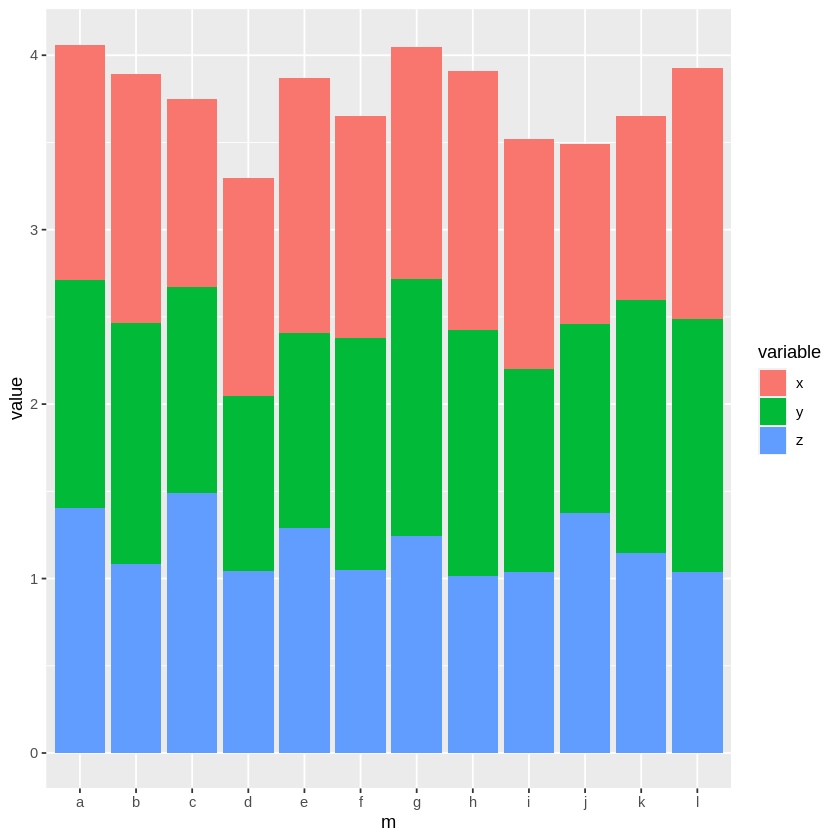

In [ ]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')